In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits import basemap

import scipy.stats

# Display up to n columns of a dataframe, alternate: "pd.set_option('display.max_columns', 150)"
pd.options.display.max_columns = 300

In [ ]:
df = pd.read_csv('dfclean.csv', index_col='date', parse_dates=True)

df.head()

In [3]:
df.drop(columns=['Unnamed: 0', 'eventid','imonth','iday','approxdate','dbsource', 'related'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191464 entries, 1970-07-02 to 2018-12-31
Columns: 127 entries, iyear to scitations
dtypes: float64(53), int64(21), object(53)
memory usage: 187.0+ MB


In [4]:
orig_idx_df = df.reset_index()

**integer-type columns (numeric)**

Text(0.5,1,'Count of Unique Values in Integer Columns')

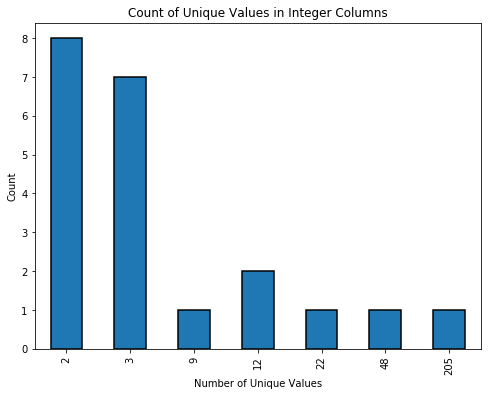

In [5]:
df.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')

Here we can see that for the most part we have columns of integer type that hold 2-3 values. For the columns with only 2 unique values, these most likely represent our Boolean columns that are made up of 0 or 1, and for columns with 3 unique inputs, these represent columns that are most likely also boolean, but also contain a "-9, -99, -999" value indicating "unknown".

Lets figure out which columns these are, it will be useful to identify them early as our boolean variables.

In [57]:
cat_cols = df.select_dtypes('object') 
print(cat_cols.shape)
int_cols = df.select_dtypes('integer') 
print(int_cols.shape)
float_cols = df.select_dtypes('float')
print(float_cols.shape)
num_cols = float_cols + int_cols
print(num_cols.shape)

(191464, 53)
(191464, 21)
(191464, 53)
(191464, 74)


In [47]:
cat_cols.nunique().sort_values(ascending=False)

summary                122113
targ_specfc1            88901
location                47061
scitations              41464
city                    39488
targ_corpgov1           35104
propcomment             20031
weapdetail              19943
addnotes                16642
motive                  15741
targ_specfc2             5301
terr_grp                 3617
resolution               3272
targ_corpgov2            2851
provstate                2579
terr_grp_subname         1257
targ_specfc3              761
targ_corpgov3             463
terr_grp2                 453
ransomnote                417
kidhijcountry             217
targ_natlty1_txt          215
country_txt               205
natlty2_txt               158
divert                    144
terr_grp3                 125
targsubtype1_txt          112
natlty3_txt               112
targsubtype2_txt          107
targsubtype3_txt           92
terr_grp_subname2          62
weapsubtype1_txt           30
weapsubtype2_txt           28
targtype2_

In [46]:
float_cols.nunique().sort_values(ascending=False)

latitude                         54220
longitude                        54080
propvalue                          682
ransomamt                          466
ndays                              346
nwound                             240
targ_natlty1                       215
n_hostages                         210
nkill                              207
ransompaid                         174
nreleased                          160
natlty2                            158
nattackers                         114
targsubtype1                       112
natlty3                            112
targsubtype2                       107
nkillter                            99
targsubtype3                        92
nattackers_captured                 51
nwoundte                            48
nwoundus                            47
nhours                              35
nkillus                             31
weapsubtype1                        30
weapsubtype2                        28
n_ushostages             

In [80]:
col_list = ['specificity','alternative','weaptype4','propextent','ransom','responsibility_claimed','claim2',
            'responsibility_claim_multiple','ishostkid','claim3','guncertain1','guncertain2', 'guncertain3']
#cal_counts = [c.values.value_counts() for c in float_cols if c in col_list]
col_list.

AttributeError: 'str' object has no attribute 'values'

In [73]:
float_cols[['specificity','alternative','weaptype4','propextent','ransom','responsibility_claimed','claim2',
            'responsibility_claim_multiple','ishostkid','claim3','guncertain1','guncertain2', 'guncertain3']]

,specificity,alternative,weaptype4,propextent,ransom,responsibility_claimed,claim2,responsibility_claim_multiple,ishostkid,claim3,guncertain1,guncertain2,guncertain3
date,,,,,,,,,,,,,
1970-07-02,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-08-24,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN
1970-01-06,4.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-24,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-28,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-01,1.0,NaN,NaN,3.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-02,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-02,1.0,2.0,NaN,3.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1970-01-02,1.0,NaN,NaN,3.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [42]:
int_cols.nunique()

iyear                  48
extended                2
country               205
region                 12
vicinity                3
crit1                   2
crit2                   2
crit3                   2
doubtterr               3
connctd_attk            2
success                 2
suicide                 2
attacktype1             9
targtype1              22
individual              2
weaptype1              12
property                3
INT_LOG                 3
INT_IDEO                3
INT_MISC                3
International_attk      3
dtype: int64

In [181]:
bool_cols = df[['extended','vicinity','crit1','crit2','crit3',
                    'doubtterr','connctd_attk','success','suicide',
                   'individual','property','INT_LOG','INT_IDEO','INT_MISC','International_attk']]

bool_w_unknwns = bool_cols[['extended', 'crit3', 'individual', 'property', 'INT_LOG', 'INT_IDEO', 'INT_MISC']]

**Floats (numeric)**

In [6]:
float_df = df.select_dtypes('float')
float_chnk1 = float_df.iloc[:, 0:14]
float_chnk2 = float_df.iloc[:, 14:28]
float_chnk3 = float_df.iloc[:, 28:42]
float_chnk4 = float_df.iloc[:, 42:]
print(float_chnk1.shape, float_chnk2.shape, float_chnk3.shape, float_chnk4.shape)

(191464, 14) (191464, 14) (191464, 14) (191464, 11)


**Visualize distribution of floats with Density plot, colored by success/fails**

- float columns density by outcome type(success/fail)
    - (part 1:"float_chunk1")

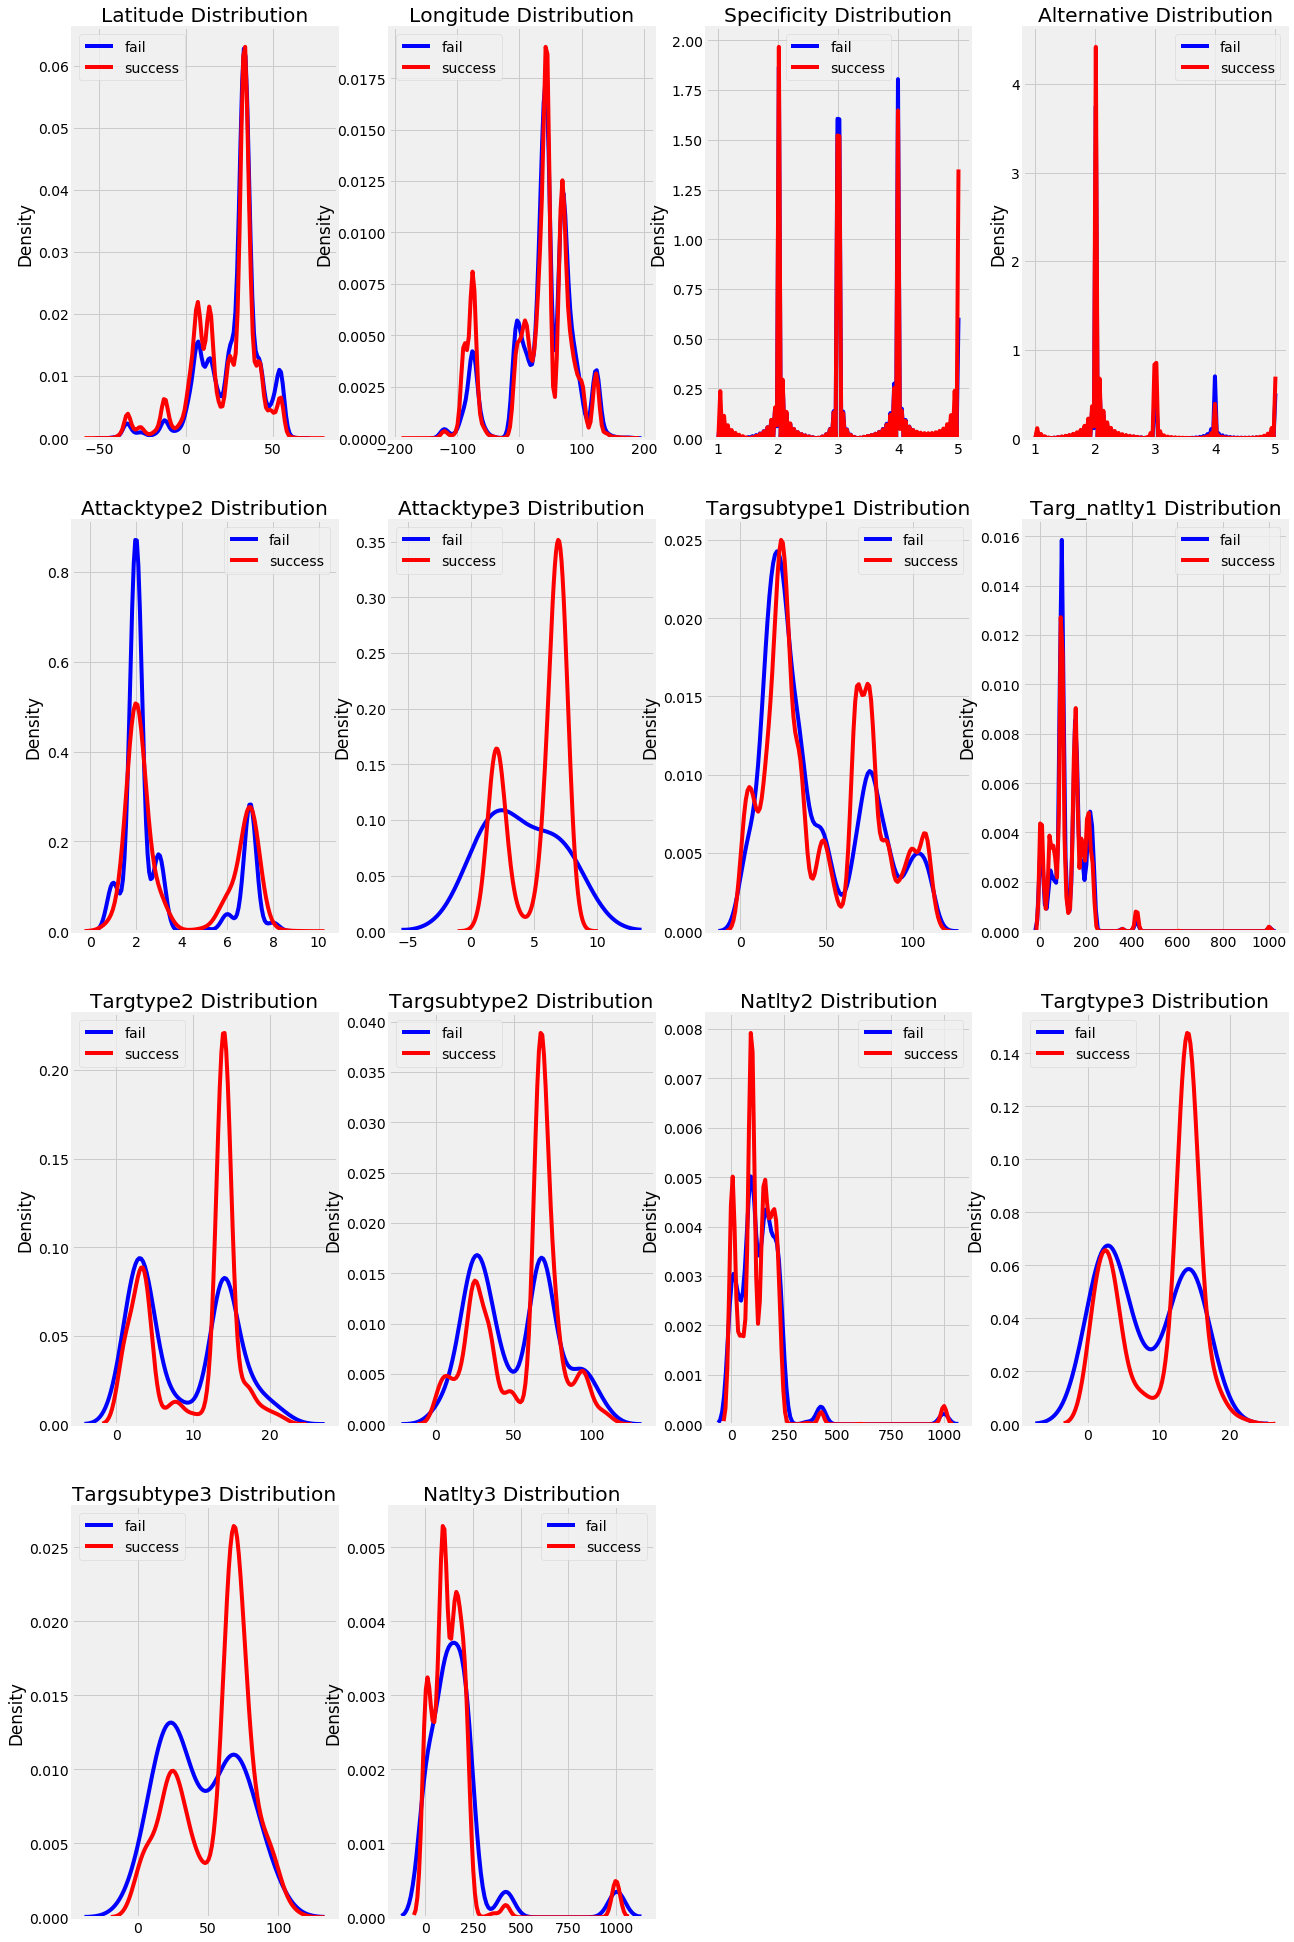

In [7]:
from collections import OrderedDict

plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(float_chnk1): # iterate on cols
    ax = plt.subplot(4, 4, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

- float columns density by outcome type(success/fail)
    - (part 2:_float_chunk2_)

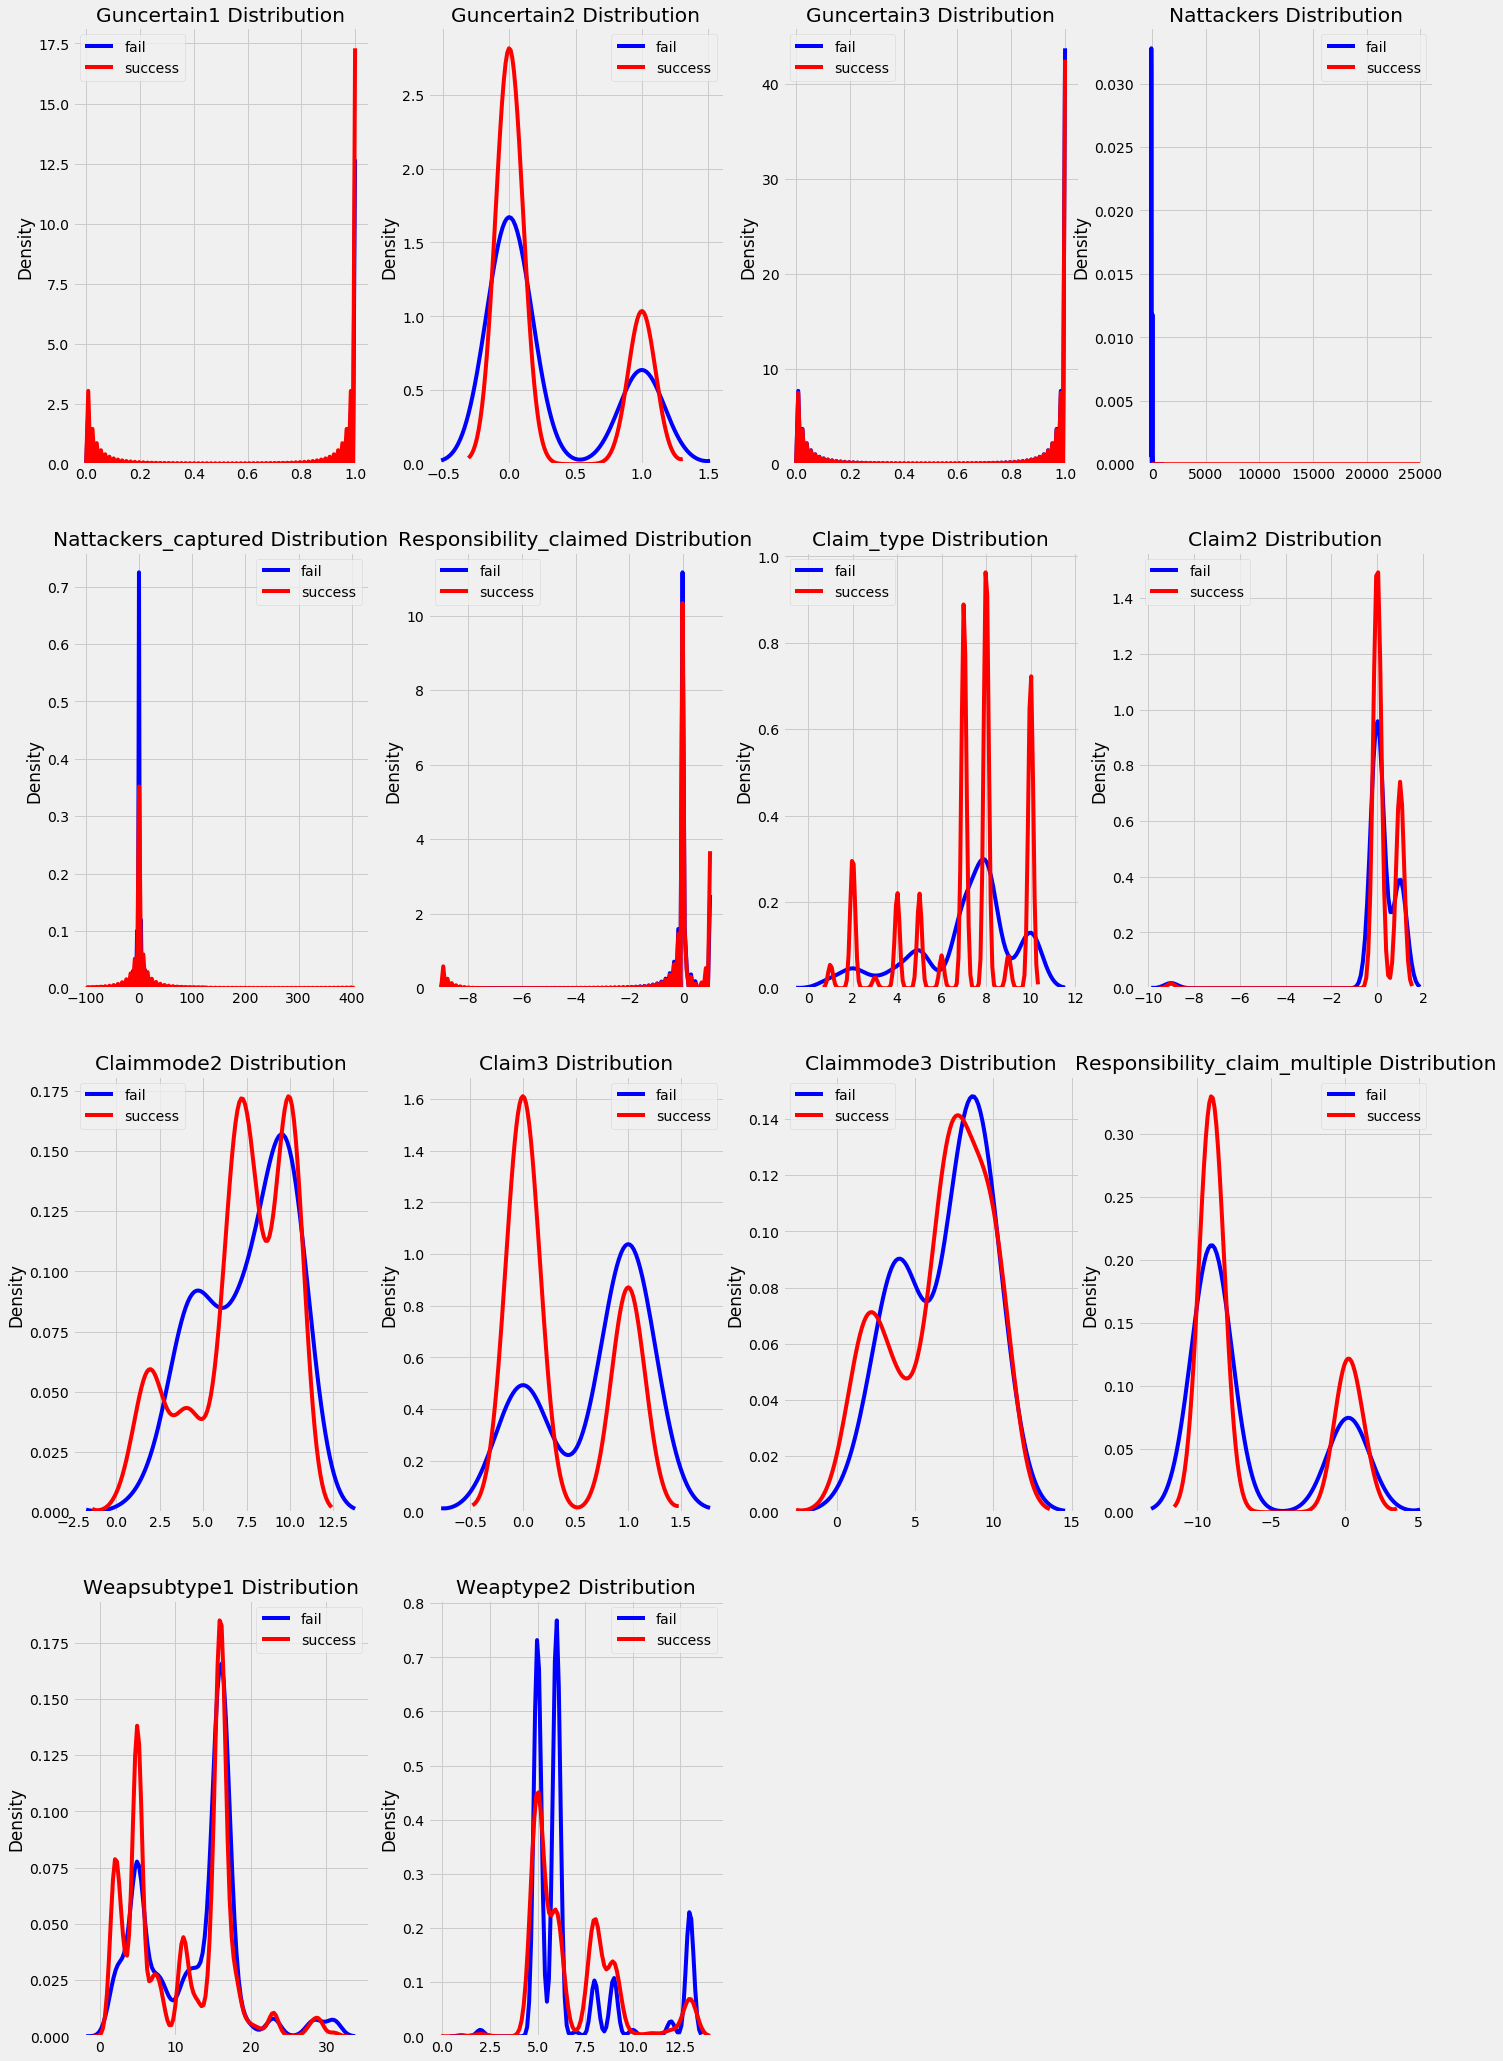

In [8]:
plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(float_chnk2): # iterate on cols
    ax = plt.subplot(4, 4, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

- float columns density by outcome type(success/fail)
    - (part 3:"float_chunk3")

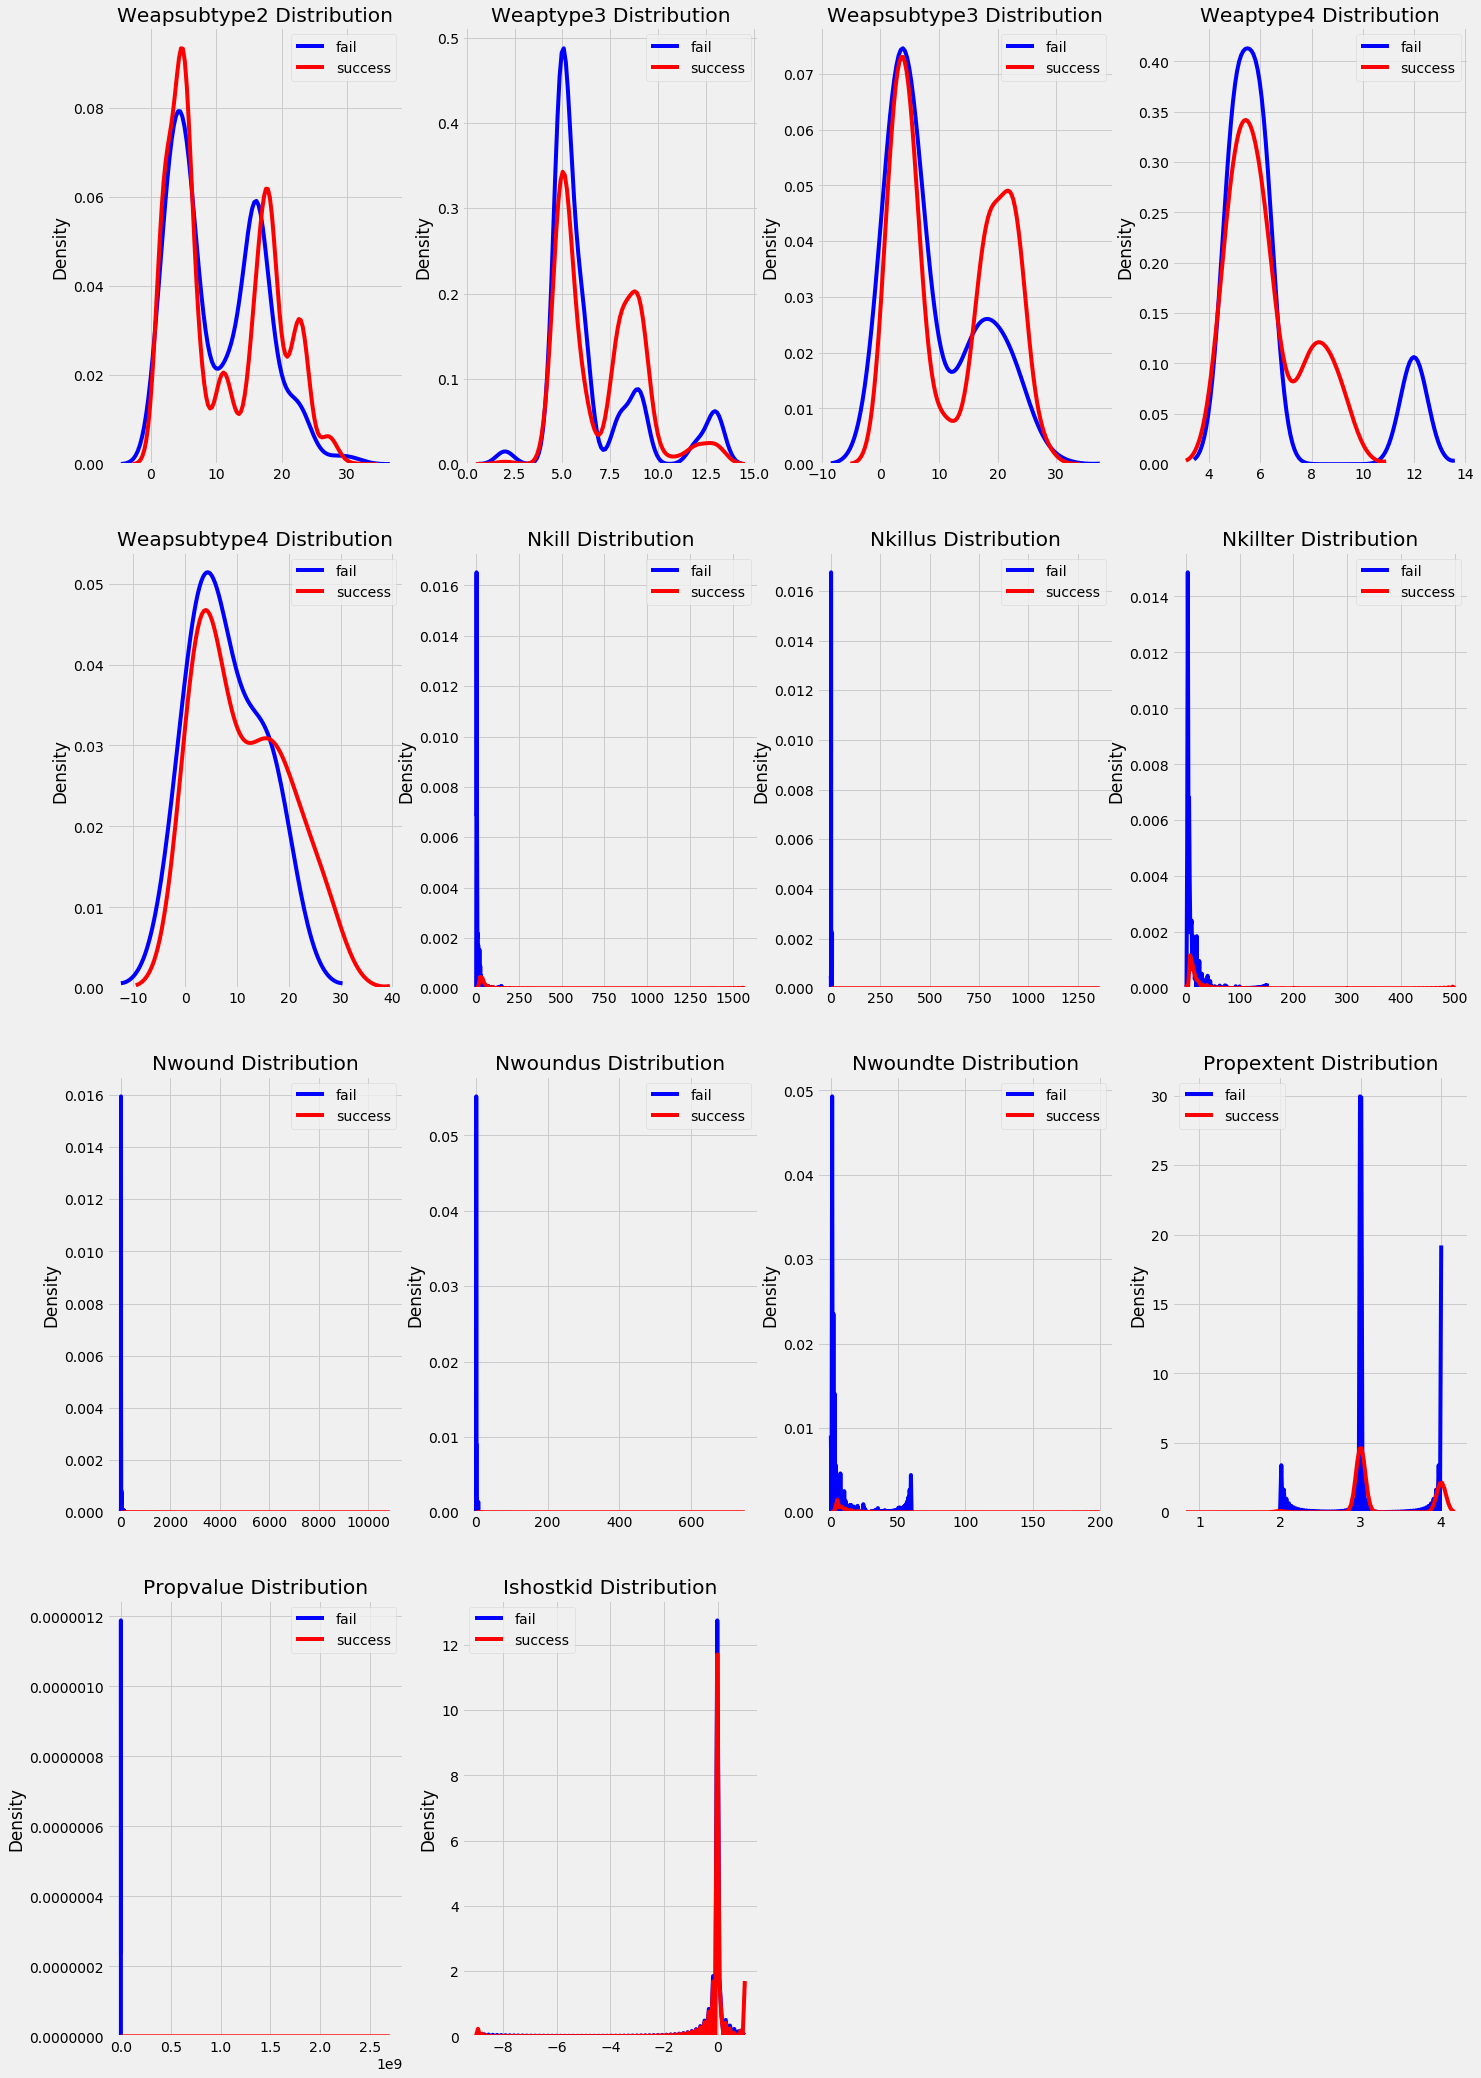

In [9]:
plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(float_chnk3): # iterate on cols
    ax = plt.subplot(4, 4, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

- float columns density by outcome type(success/fail)
    - (part 4:"float_chunk4")

C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


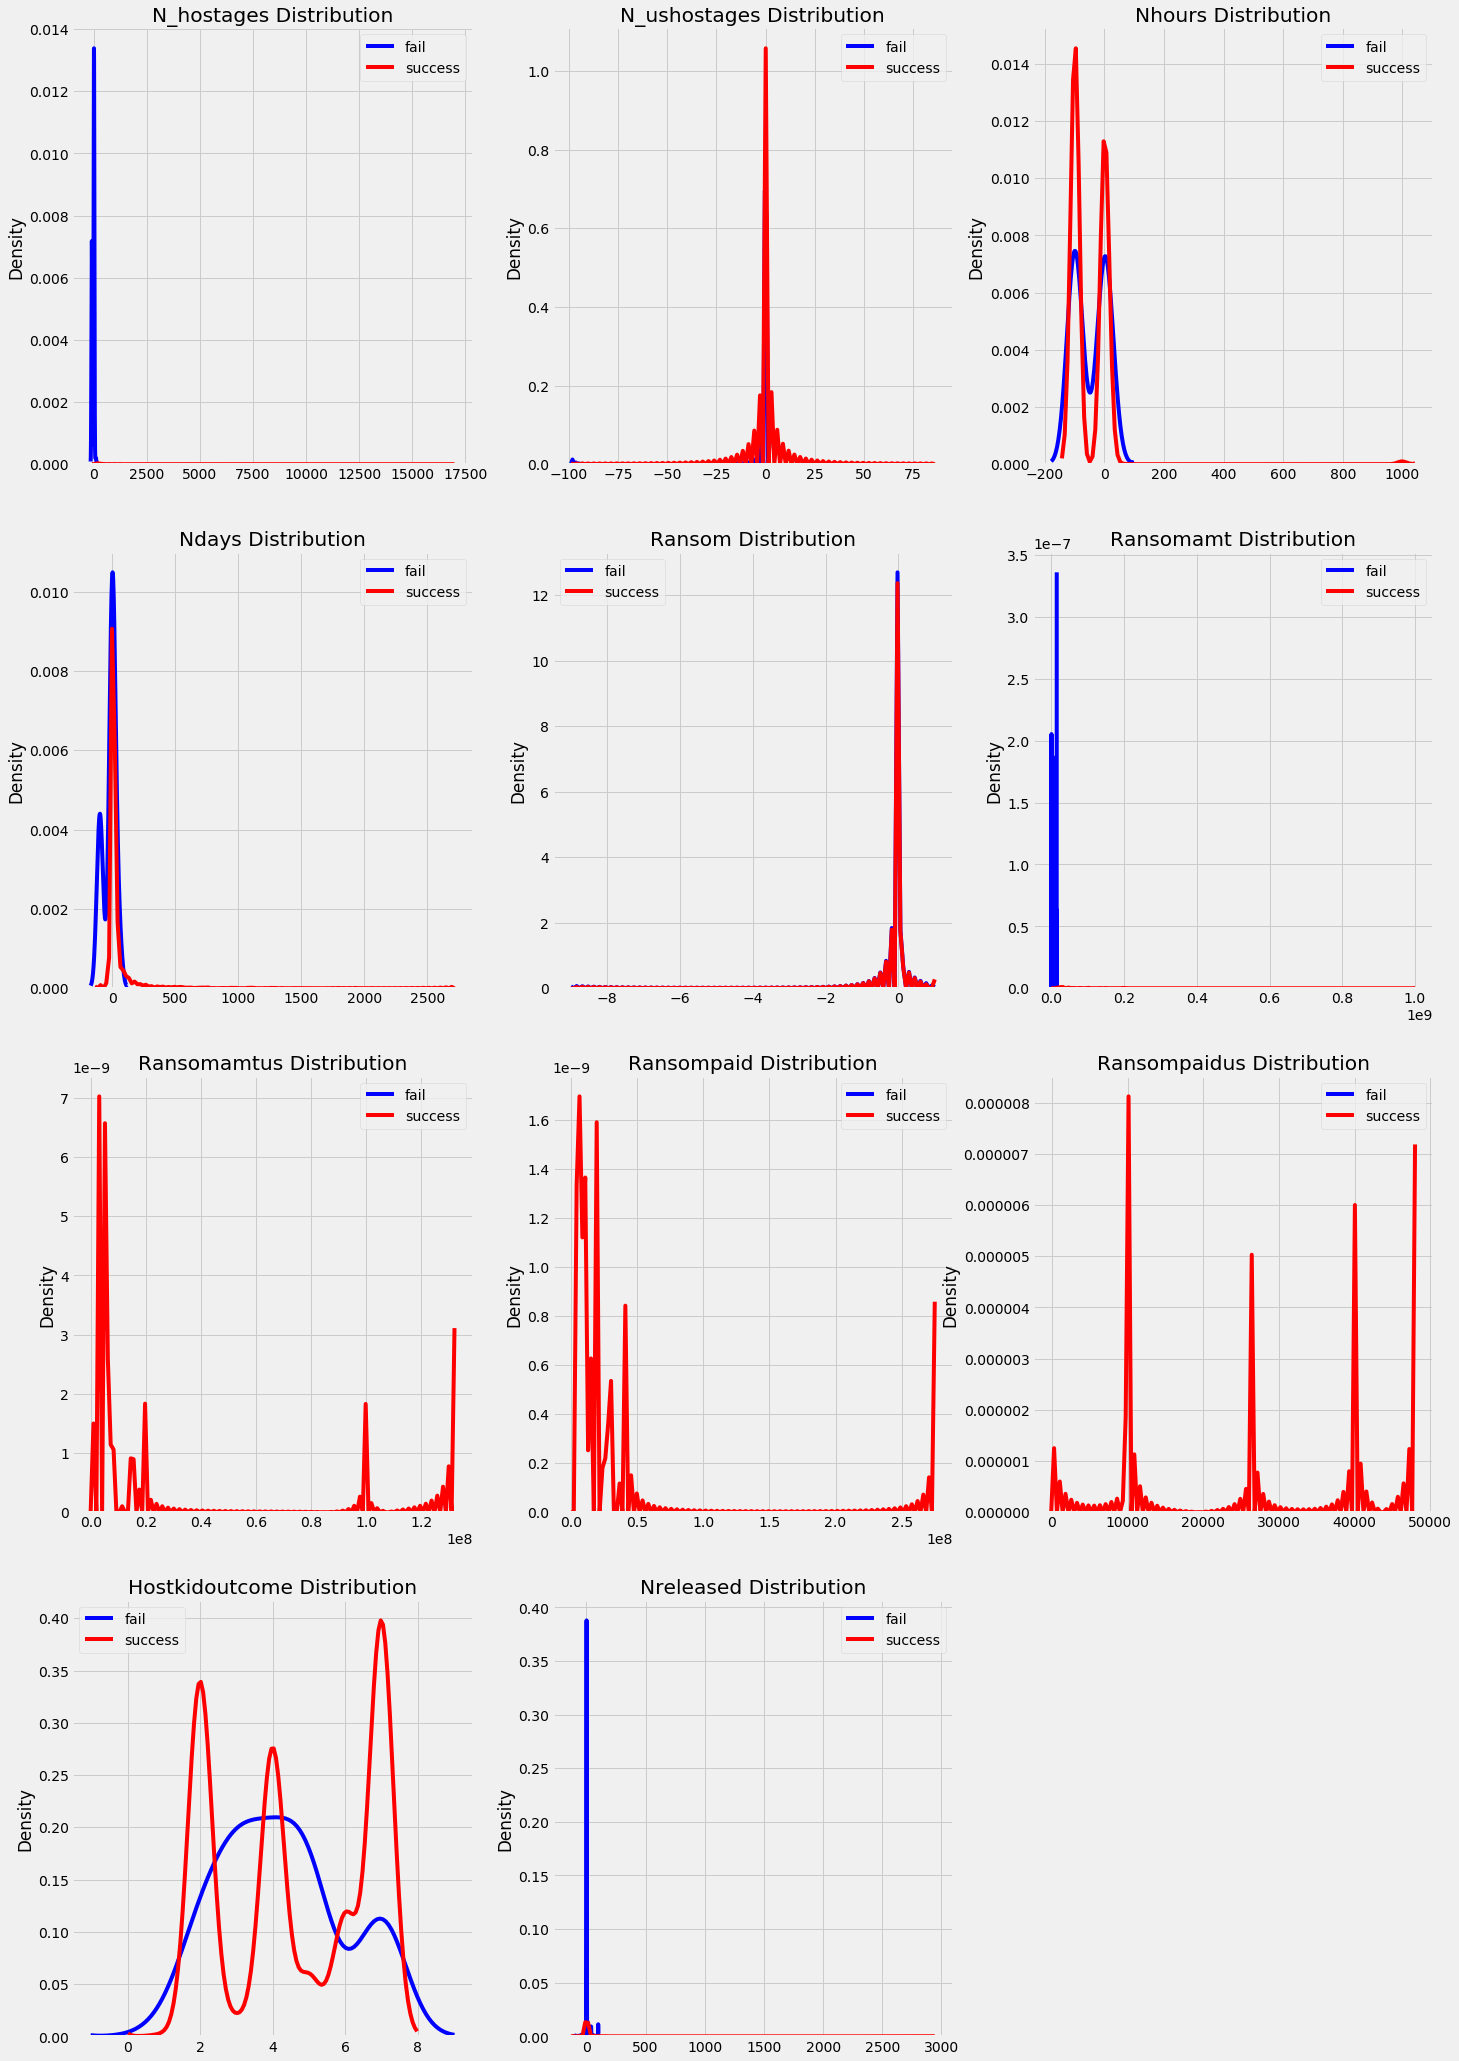

In [10]:
plt.figure(figsize = (45, 30))
plt.style.use('fivethirtyeight')

colors = OrderedDict({0: 'blue', 1: 'red' })
outcome = OrderedDict({0: 'fail', 1: 'success'})


for i, col in enumerate(float_chnk4): # iterate on cols
    ax = plt.subplot(4, 3, i + 1)
    for success, color in colors.items(): # iterate on outcome
        sns.kdeplot(df.loc[df['success'] == success, col].dropna(),
                    ax= ax, color= color, label= outcome[success])  # Plot each outcome class (success/fail)     
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(right=0.5, top=1)

- **object-type columns**

In [11]:
df.select_dtypes('object').head(5)

,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,targ_corpgov1,targ_specfc1,targ_natlty1_txt,targtype2_txt,targsubtype2_txt,targ_corpgov2,targ_specfc2,natlty2_txt,targtype3_txt,targsubtype3_txt,targ_corpgov3,targ_specfc3,natlty3_txt,terr_grp,terr_grp_subname,terr_grp2,terr_grp_subname2,terr_grp3,terr_grp_subname3,motive,claim_type_txt,claimmode2_txt,claimmode3_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,weapdetail,property_damage_txt,propcomment,divert,kidhijcountry,ransomnote,hostage_outcome_txt,addnotes,scitations
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-07-02,NaN,Dominican Republic,Central America & Caribbean,National,Santo Domingo,NaN,NaN,NaN,Assassination,NaN,NaN,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-08-24,NaN,Mexico,North America,Federal,Mexico city,NaN,NaN,NaN,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,NaN,NaN
1970-01-06,NaN,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,NaN,Assassination,NaN,NaN,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-24,NaN,Greece,Western Europe,Attica,Athens,NaN,NaN,NaN,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-28,NaN,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,NaN,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df.scitations[5])
df.addnotes[5]

"Police Chief Quits," Washington Post, January 2, 1970. ... "Cairo Police Chief Quits; Decries Local 'Militants'," Afro-American, January 10, 1970. ... Christopher Hewitt, "Political Violence and Terrorism in Modern America: A Chronology," Praeger Security International, 2005.


'The Cairo Chief of Police, William Petersen, resigned as a result of the attack.'

We can see the similarity in type of information, so lets consolidate some more by combining "addnotes" with "scitations" and get rid of both orginals.

df['scitations_and_notes'] = df['scitations'].astype(str) + ' ... ' + df['addnotes'].astype(str)

df.drop(columns=['scitations', 'addnotes'], inplace=True)

Text(0.5,1,'Unique Value counts')

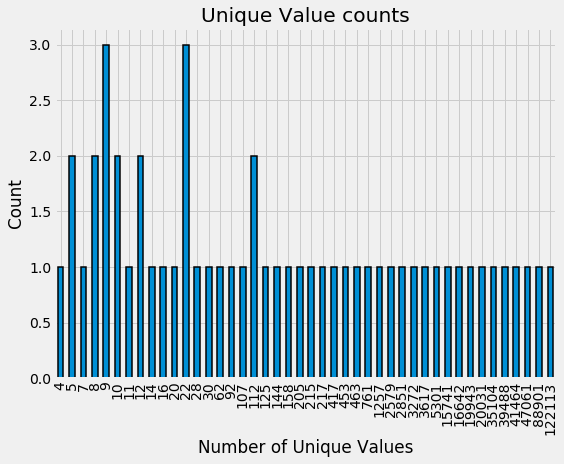

In [13]:
df.select_dtypes('object').nunique().value_counts().sort_index().plot.bar(figsize = (8, 6), edgecolor = 'k', linewidth = 1.5);
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Unique Value counts')

**EXPLORATORY DATA ANALYSIS**

Now that we've dealt with all of the cleaning and formatting, the next step in the process is to dig into the data and make sense of things by-in-large visually. This Process is referred to as Exploratory Data Analysis or EDA for short. The overall purpose of this crucial step is to better understand the data. To discover patterns and analyze the interconnectedness of our variables amongst themselves as well as their individual correlation with our target in an effort to pin-point the most predicitive variables that we may select as features for machine learning. If no target has been determined at this point, then EDA would truely be as exploratory as it gets, and through the exploration process one would be able to formulate a direction to move towards in choosing a variable and establishing it as a target for prediction. It usually makes more sense to have your target variable/feature in place early on, but is not required.

**Steps:**
    
   1. Univariate Analysis
       - visualize distributions of variables with Histograms, boxplots
           - This will provide insight on skewness, non-linearity, potential outliers and the need for transformations and scaling on variables to establish more predictive input data for future model.
           
   2. Bivariate Anal
       - numerical and categorical exploration and visualization
           - attacks (categoric: "success") by year and decade (numerical: "iyear", "decades")
           - visualize density distributions of Success/Fails (numeric in this form) by attack, weapon, and target-types (attack/weapon/targets:categorical)
       - categorical and categorical exploration and visualization
           - Successes and Fails (categoric: "success") segmented by attack, weapon and victom or target-types (attacktype1_txt/weaptype1_txt, targtype1_txt: categorical) analyized by two-way table, visualized with bar or count-plots
       - numerical and numerical exploration and visualization
           - correlation matrix of all numerical variables and visually displayed with heatmap
   3. Multivariate Analysis
       - 

Im going to **dig into success, attacktype1_txt, weaptype1_txt, targtype1_txt, and terror_group variables**. All of these mentioned variables of current interest are categoric except success, which is a discrete boolean variable. As a good refresher lets remind ourselves of the properties of discrete, boolean and categoric type variables because with this dataset, will be dealing with these in majority.

- boolean type variable is a subclass of the int class and are represented as "Yes" and "No". When converting boolean filled columns to numeric-type for machine learning tasks, always is Yes=1, No=0 
- discrete variables are made up of distinct values and are counted. Categoric variables when encoded are always discrete. Categorical variables involve classes or categories and can be nominal (no order categories) or ordinal (order among categories). Examples would be "size" variable with S, M, L for categories. In relation to each other, there is oder i.e., S < M < L. Example of nominal categoric variable would be like most the categoric data dealt with in this dataset. For example, the variable "weaptype1_txt" (displayed in final print-out from the above cell) has classes, "Military", "Police", "Utilities", etc.. where there is no relational ordering among the categories.

I want to build a model that predicts outcome of attack, based off of "success" variable that will be my dependant y-variable, or, the target.

**"Success"**

The Success variable represents whether the terrorist attack was, you guessed it, successful or not. The GTD handbook gives full description of how they determined whether attack was deemed successful:

   _"Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression. The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed."_ [GTD Codebook(pg26)](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

Since "success" is a categorical feature, this presents a classification problem and project. I will begin the EDA process performing univariate analysis on the target. Because "success" is a discrete-categorical column by nature, we will look within its classes/categories and visualize count totals count percentages and frequency distributions.

# Univariate Analysis
- Looking at target feature "success" count and count percentage

Total number of successful attacks: 169795
Total number of failed attacks: 21669


Successful attacks as a percentage of all attacks: 0.887
Failed attacks as a percentage of all attacks: 0.113


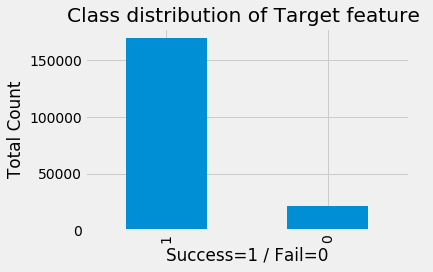

In [14]:
print('Total number of successful attacks: ' + str(df.loc[df.success == 1, 'success'].count()))
print('Total number of failed attacks: ' + str(df.loc[df.success == 0, 'success'].count()))
print('\n')

succ = int(df.loc[df.success == 1, 'success'].count())
fail = int(df.loc[df.success == 0, 'success'].count())

tot = succ + fail
success_percentage = succ / tot
fail_percentage = fail / tot

df.success.value_counts().plot.bar()
plt.title('Class distribution of Target feature '), plt.xlabel('Success=1 / Fail=0'), plt.ylabel('Total Count')
plt.tight_layout()

print('Successful attacks as a percentage of all attacks: ' + str(round(success_percentage, 3)))
print('Failed attacks as a percentage of all attacks: ' + str(round(fail_percentage, 3)))

As shown in the plot, the successful attacks vs attacks deemed unsuccessful is very lop-sided, which means if chosen as target, we then are dealing with not only a binary classification problem, but one that is unbalanced among its classes ("0" and "1"). Unbalanced targets arent uncommon and a widely used method for dealing with unbalanced classes, like we have here, is known as **resampling**. Where you either up-sample the under-represented class ("0") or down-sample on "1" (over-represented). 

Described in other words and displayed below ([image and quote source](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)), "It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).". 

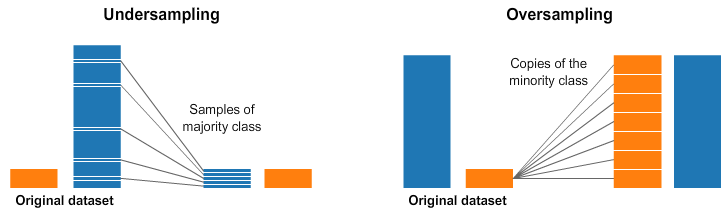

Dealing with this unbalanced set is something that will need to be dealt with but not at this stage. For now lets get back to exploring more of our data.

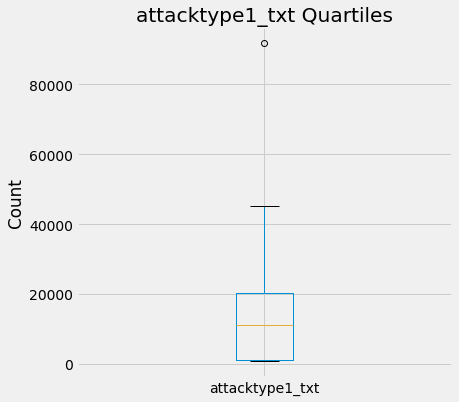

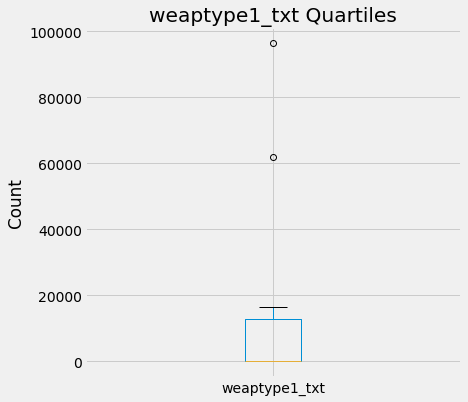

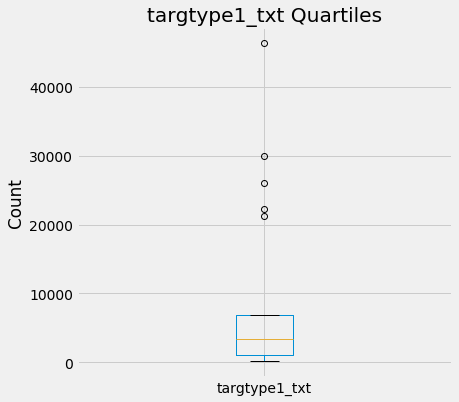

In [15]:
# custom function for boxplot
def plot_bx(df, col):
        
    plt.figure(figsize = (6, 6))
    df[col].value_counts().plot.box()
    plt.title(f'{col} Quartiles'); plt.ylabel('Count'); plt.show()
    
# Plot variables of interest
plot_bx(df, 'attacktype1_txt'); plot_bx(df, 'weaptype1_txt'); plot_bx(df, 'targtype1_txt')

# Bivariate Analysis 
- begin numerical and categorical exploration

Lets Start by taking a top-down Birds-eye view by looking at trends over the years for number of attacks as a whole, world-wide. The number of attacks by region, then the success rate, or the number of success vs fails per region. After, we will focus less on where these attacks are coming from and more into the characteristics successful and unseuccessful attacks.

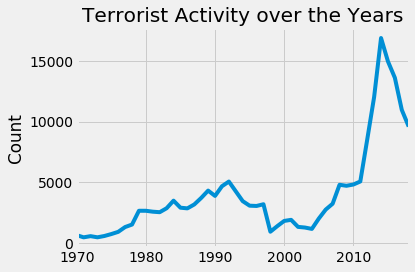

In [16]:
df.iyear.value_counts().sort_index().plot()
plt.title('Terrorist Activity over the Years'), plt.ylabel('Count')
plt.tight_layout()

We can see the trend here over the entire course of time attacks had been being tracked. In the bar-chart above we can clearly see there began a decline from the 80's through the 2000's, then things really got out of hand relative to previous decade totals, in the 2010-current bin. Lets take a closer look at this last decade. Not only the steep incline, but decline also at about the midpoint (of the decade) it looks like.


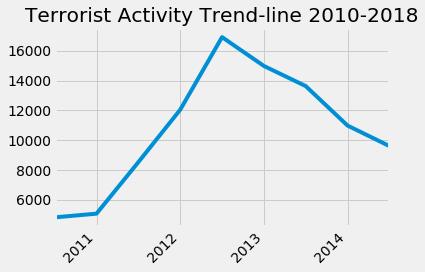

In [17]:
x = df.iyear.value_counts().sort_index()
x = pd.DataFrame(x, index=x.index)
x = x.reset_index()
x.rename(columns={'index':'year', 'iyear':'total_attacks'}, inplace=True)
xlabel = x.iloc[39:].year.values
chart = x.iloc[39:].total_attacks.plot()
chart.set_xticklabels(xlabel, rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.title('Terrorist Activity Trend-line 2010-2018')
plt.tight_layout()

success      0      1
decades              
1970s      939   8975
1980s     2326  28832
1990s     2625  26139
2000s     1747  23311
2010s    14032  82538


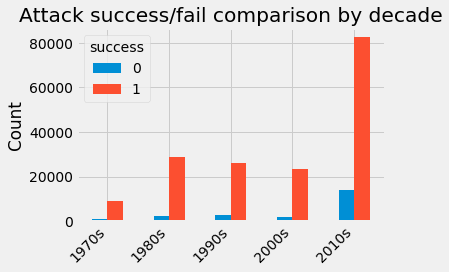

In [18]:
decades = 10 * (df.iyear // 10)
decades = decades.astype(str) + 's'
decades.name = 'decades'

print(df.groupby([decades, 'success'])['success'].count().unstack())

chart = df.groupby([decades, 'success'])['success'].count().unstack().plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Attack success/fail comparison by decade'), plt.ylabel('Count'), plt.xlabel('')
plt.tight_layout()

Middle East & North Africa     53110
South Asia                     48266
Sub-Saharan Africa             19752
South America                  19292
Western Europe                 16843
Southeast Asia                 13363
Central America & Caribbean    10359
Eastern Europe                  5217
North America                   3579
East Asia                        808
Central Asia                     571
Australasia & Oceania            304
Name: region_txt, dtype: int64


Text(0.5,1,'distribution of attacks per "Region"')

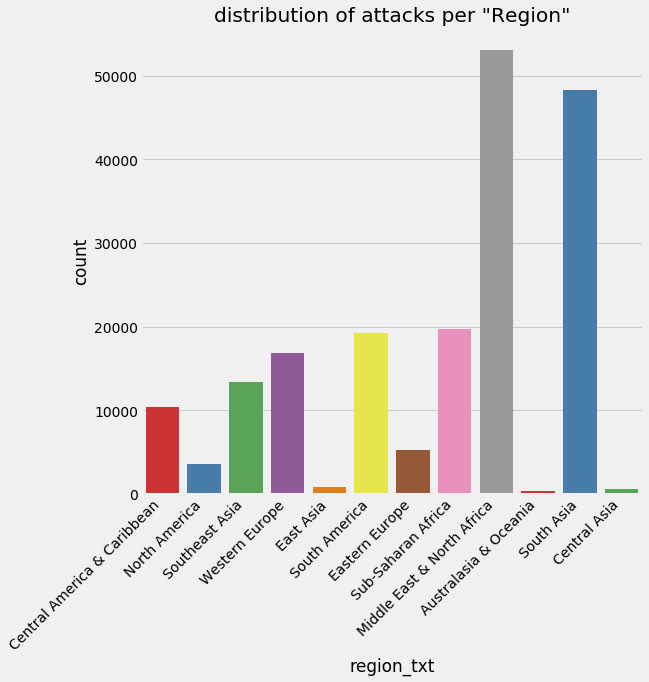

In [19]:
print(df.region_txt.value_counts().sort_values(ascending=False))

# countplot displaying count for each region
plt.figure(figsize=(8,8))
chart = sns.countplot(data=df, x='region_txt', palette='Set1') 
                                                            
# Because we don't want to change the labels themselves, we can just call get_xticklabels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution of attacks per "Region"')

Now, Lets look at success rate per region.

success,region_txt,fail,success,tot_attks,success%
5,Middle East & North Africa,6685,46425,53110,0.874
8,South Asia,6193,42073,48266,0.872
10,Sub-Saharan Africa,1472,18280,19752,0.925
7,South America,1387,17905,19292,0.928
11,Western Europe,2517,14326,16843,0.851
9,Southeast Asia,1514,11849,13363,0.887
1,Central America & Caribbean,368,9991,10359,0.964
4,Eastern Europe,716,4501,5217,0.863
6,North America,588,2991,3579,0.836
3,East Asia,127,681,808,0.843


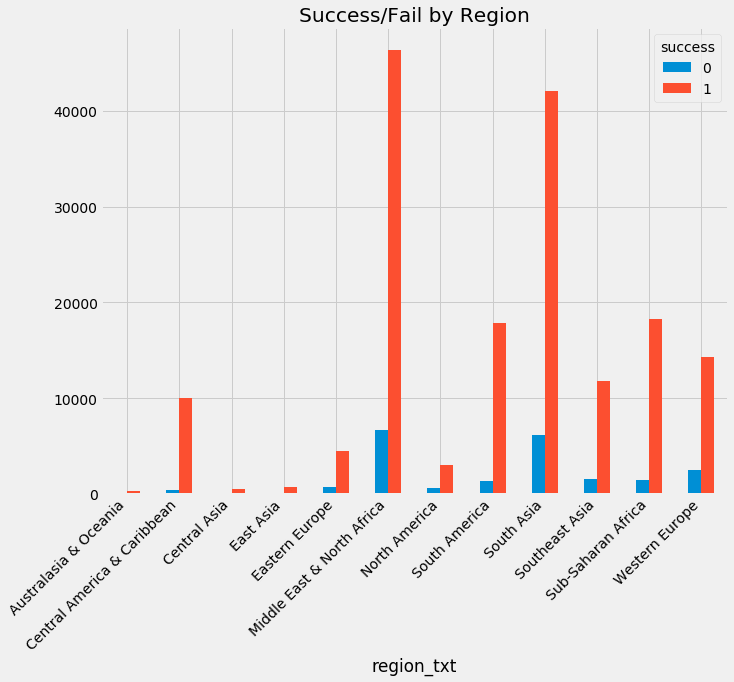

In [20]:
region_succ_outcome_grpby = df.groupby(['region_txt','success'])['success'].count().unstack()
region_succ_outcome_flat = region_succ_outcome_grpby.reset_index()
region_succ_outcome_flat.rename(columns={0:'fail', 1: 'success'}, inplace=True )

# Plot successful attacks vs unsuccessful attacks for every region
fig, ax = plt.subplots(figsize=(10, 8))
chart = region_succ_outcome_grpby.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Success/Fail by Region')

# calc success % per region
fail = region_succ_outcome_flat.fail
succ = region_succ_outcome_flat.success
region_succ_outcome_flat['tot_attks'] = tot = fail + succ
region_succ_outcome_flat['success%'] = round(succ / region_succ_outcome_flat['tot_attks'], 3)
region_succ_outcome_flat.sort_values('success', ascending=False)

(Text(0.5,1,'Attack-type total by Decade'),
 Text(0.5,0,''),
 Text(0,0.5,'Count'))

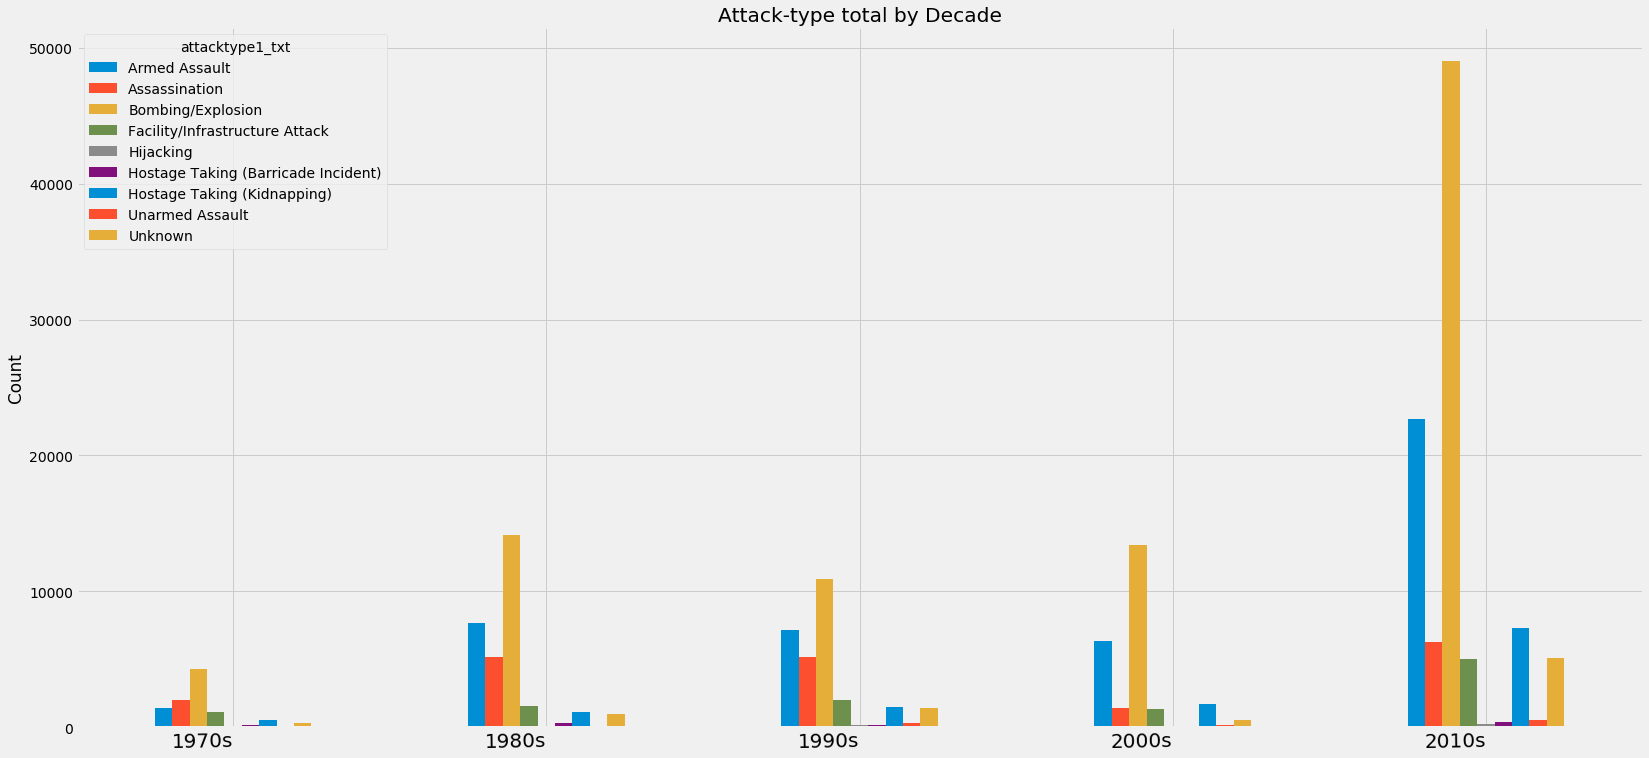

In [21]:
attktype_by_decade = df.groupby([decades, 'attacktype1_txt'])['success'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(25, 12))
chart = attktype_by_decade.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=1, fontsize=20, horizontalalignment='right')
plt.title('Attack-type total by Decade'), plt.xlabel(''), plt.ylabel('Count')

(Text(0.5,1,'Total attacks per region per Decade'),
 Text(0.5,0,''),
 Text(0,0.5,'Count'))

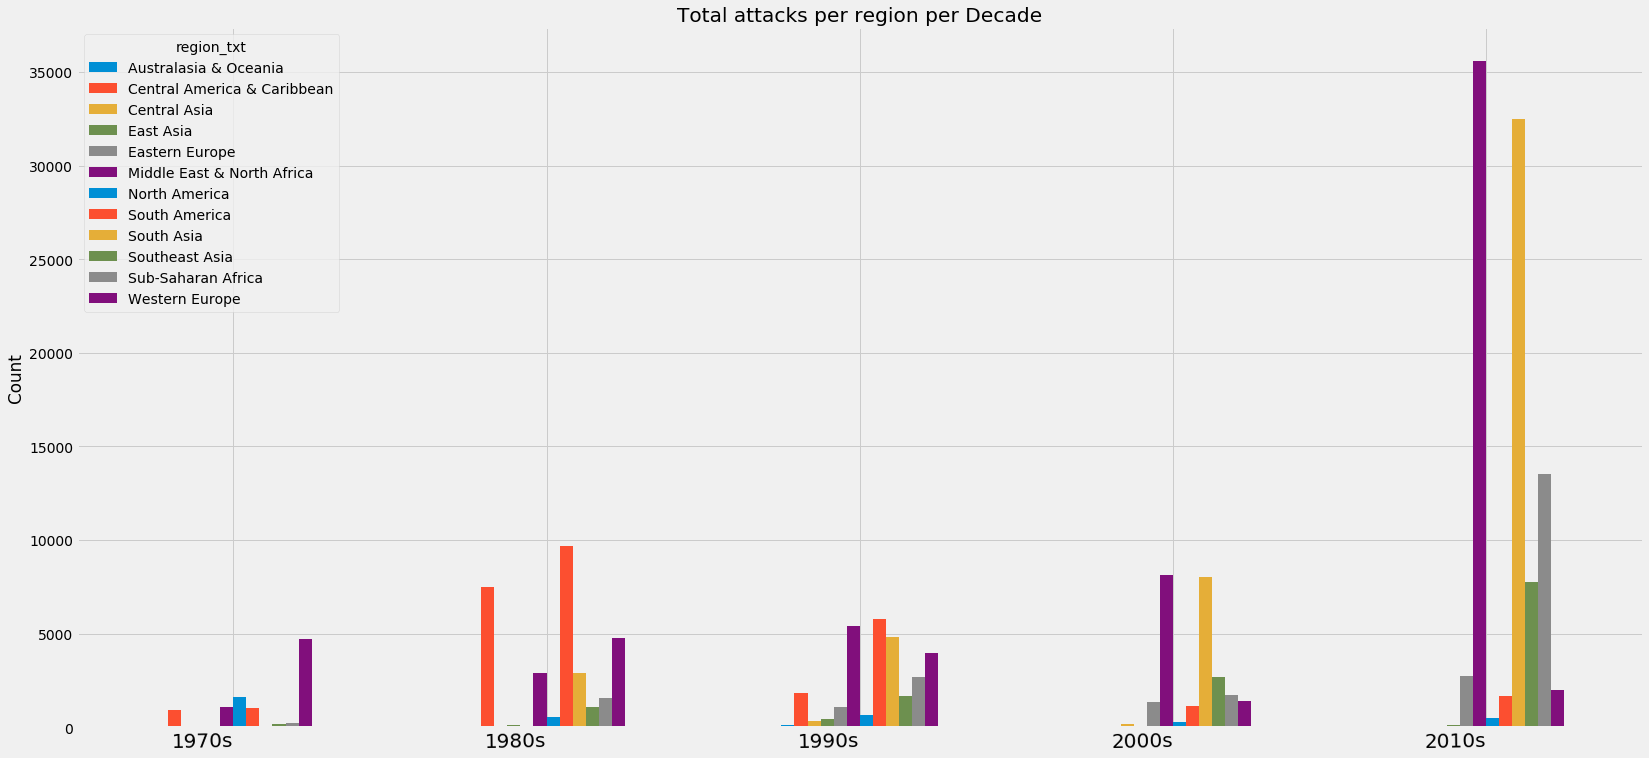

In [22]:
region_decade_attks = df.groupby([decades, 'region_txt'])['success'].count().unstack()

fig, ax = plt.subplots(figsize=(25, 12))
chart = region_decade_attks.plot.bar(ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=1, fontsize=20, horizontalalignment='right')
plt.title('Total attacks per region per Decade'), plt.xlabel(''), plt.ylabel('Count')

Weve just taken a birds-eye approach if you will, beginning with a world-wide snap shot of the overall trend in attacks by decade. From there we moved toward the potential target variable ("success") by looking at the numbers of success/fails as well as percentages by location.

**KDE PLOTS** (numerical and categorical continued)
- Normally I'd need to encode the categoric variable's classes before working with a KDE visual. Luckily, the creators of the dataset have already done this for us. I will demonstrate one way how this encoding is done with the attack-type and target-type columns immediately below and then plot KDE after.

In [23]:
# Example of cat encoding: encode attack types w/ cat.codes method
#df['attacktype1_encoded'] = df['attacktype1_txt'].astype('category').cat.codes 
#print(df['attacktype1_encoded'].value_counts())

# Manual target-type encoding to visualize numerically in KDE Plot
#df['targtype1_encode'] = df.targtype1_txt.astype('category').cat.codes
#print(df['targtype1_encode'].value_counts().sort_index())

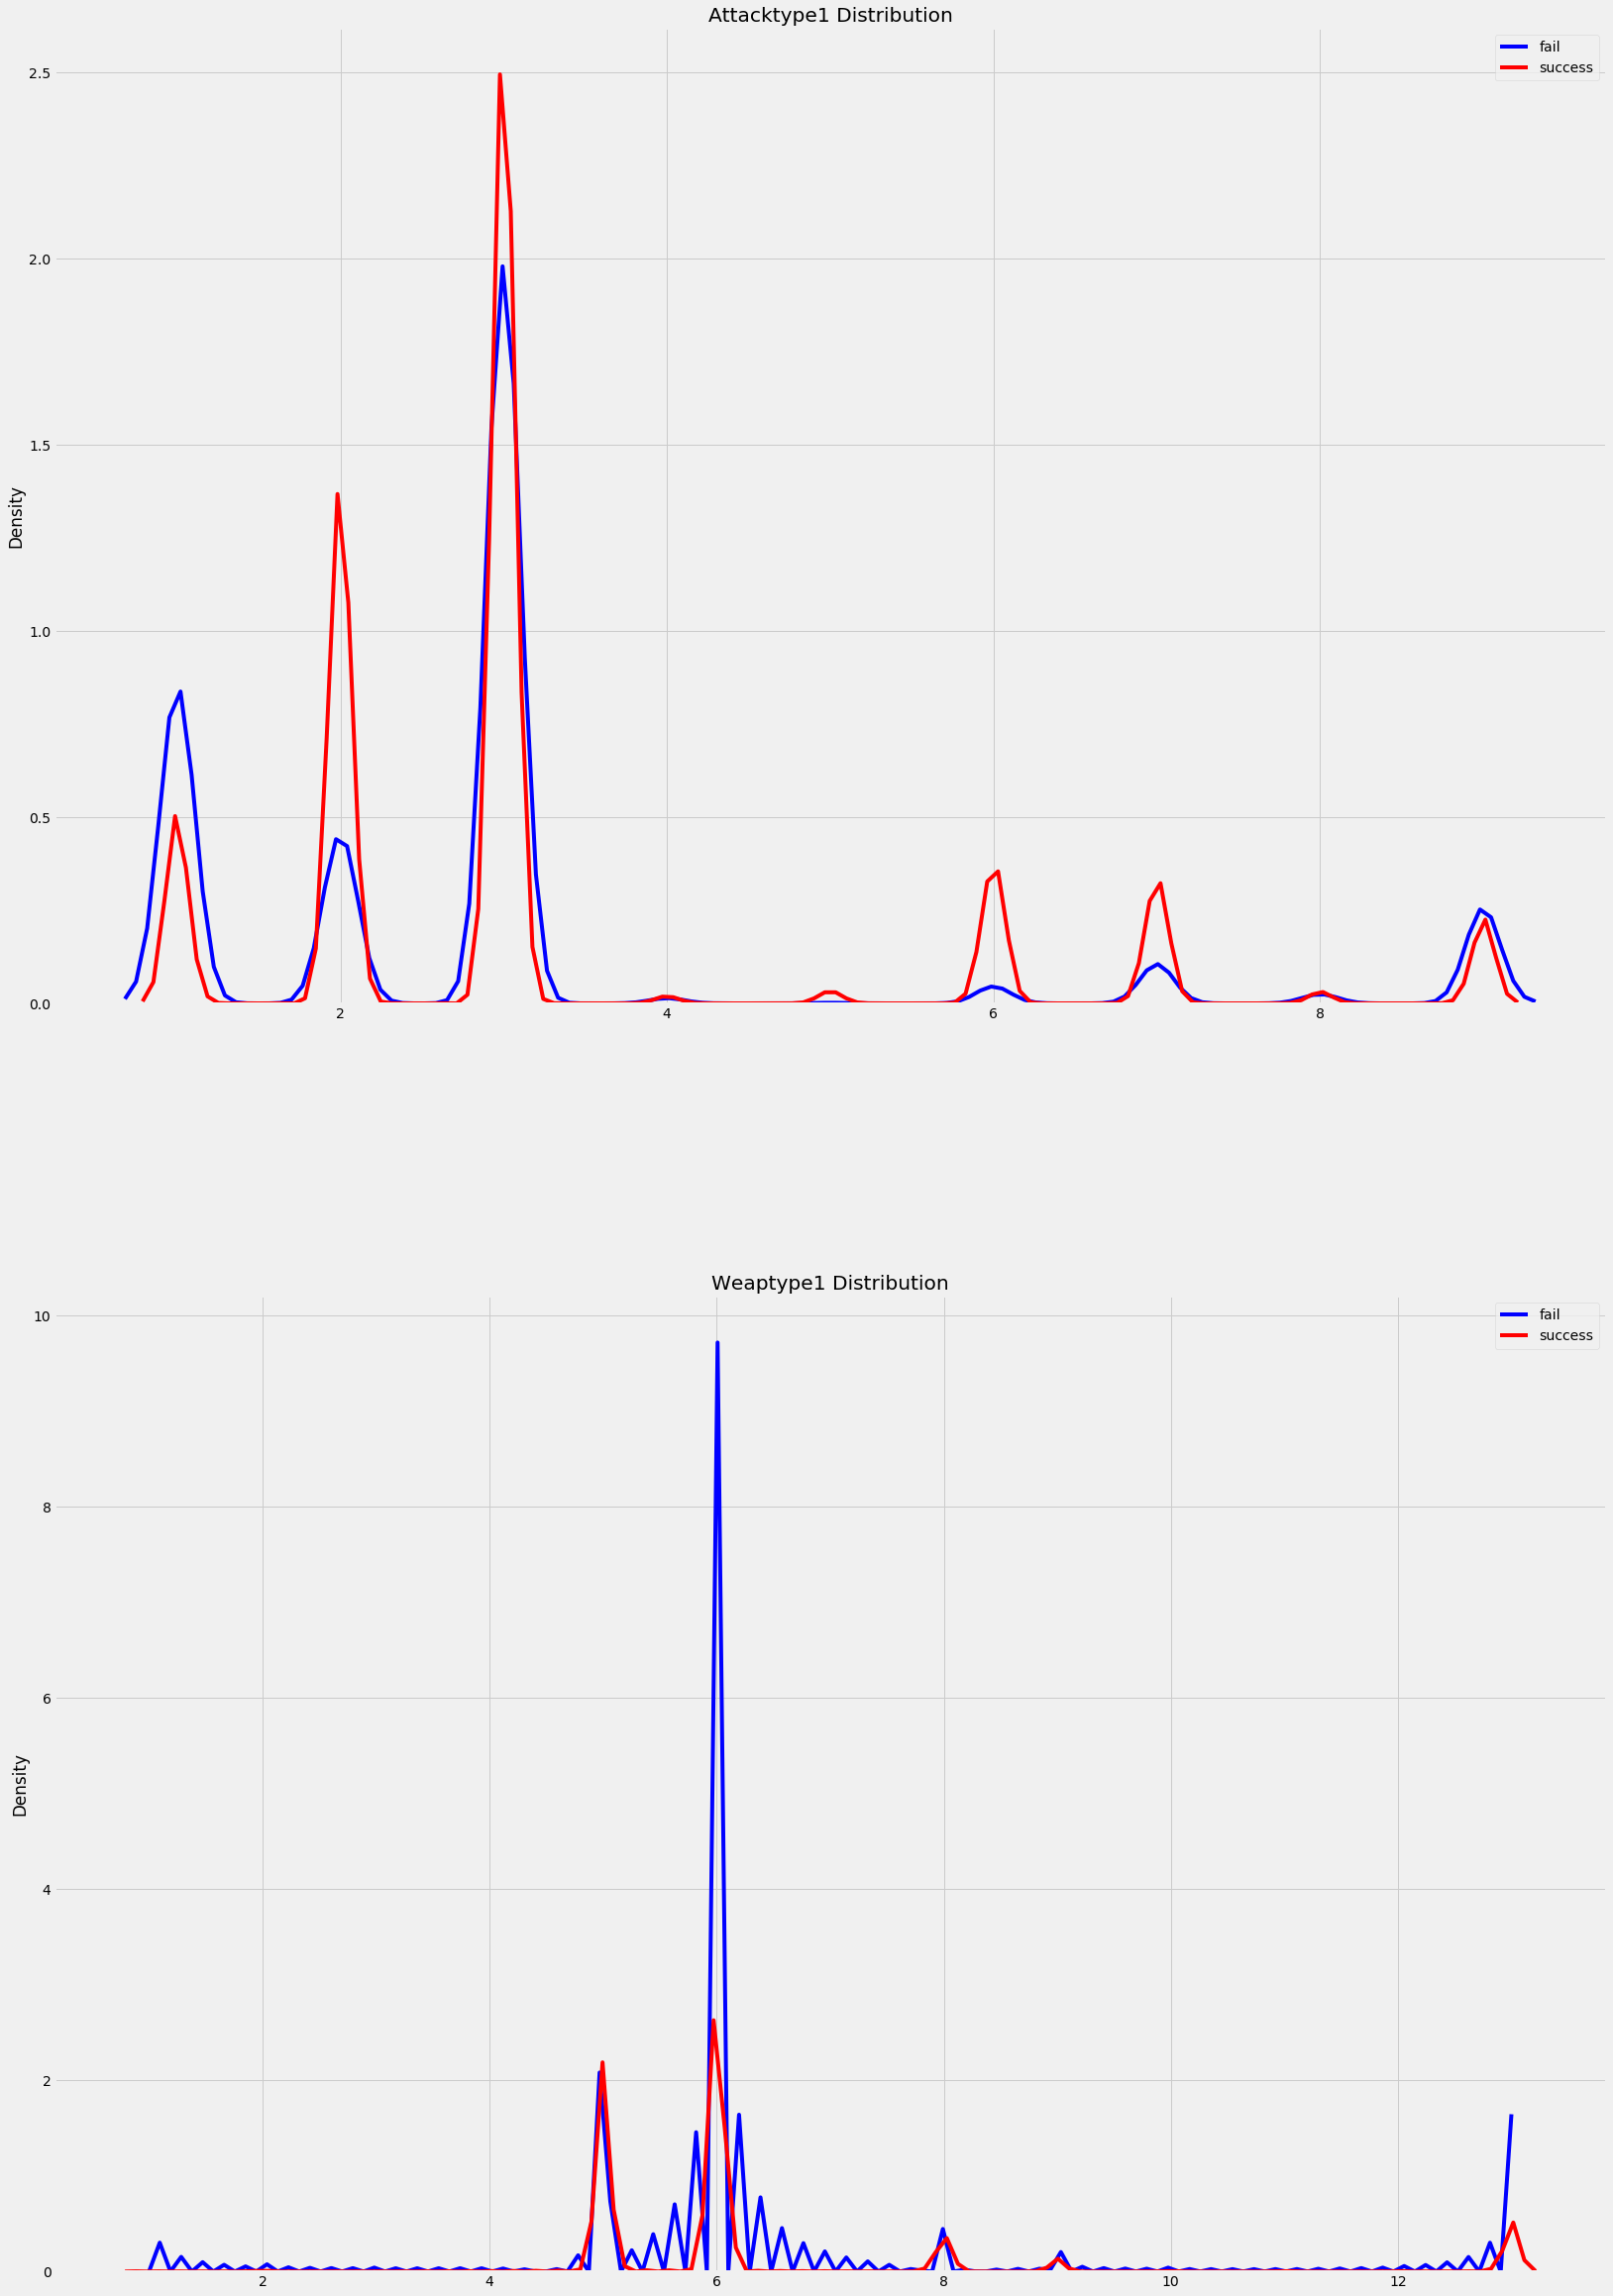

In [24]:
from collections import OrderedDict
pd.options.mode.chained_assignment = None

# plot and visualize distribution of success and fails for different attack, weapons
plt.figure(figsize = (25, 22))
plt.style.use('fivethirtyeight')

# Color mapping
color_map = OrderedDict({0: 'blue', 1: 'red' })
outcome_map = OrderedDict({0: 'fail', 1: 'success'})

for i, col in enumerate(['attacktype1', 'weaptype1']):
    ax = plt.subplot(2, 1, i + 1)
    # Iterate over success/fail
    for outcome, color in color_map.items():
        # Plot outcome for each categoric-class
        chart = sns.kdeplot(df.loc[df['success'] == outcome, col].dropna(), 
                    ax = ax, color = color, label = outcome_map[outcome])
    
    #chart.set_xticklabels(orig_targ_idx, rotation= 45, horizontalalignment='right')    
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(top = 1.5, hspace=0.3)

df['targtype1_txt'].value_counts().sort_values(ascending=False)

targ_type_counts = df.targtype1.value_counts().sort_values(ascending=False)
targ_type_counts

orig_targ_idx

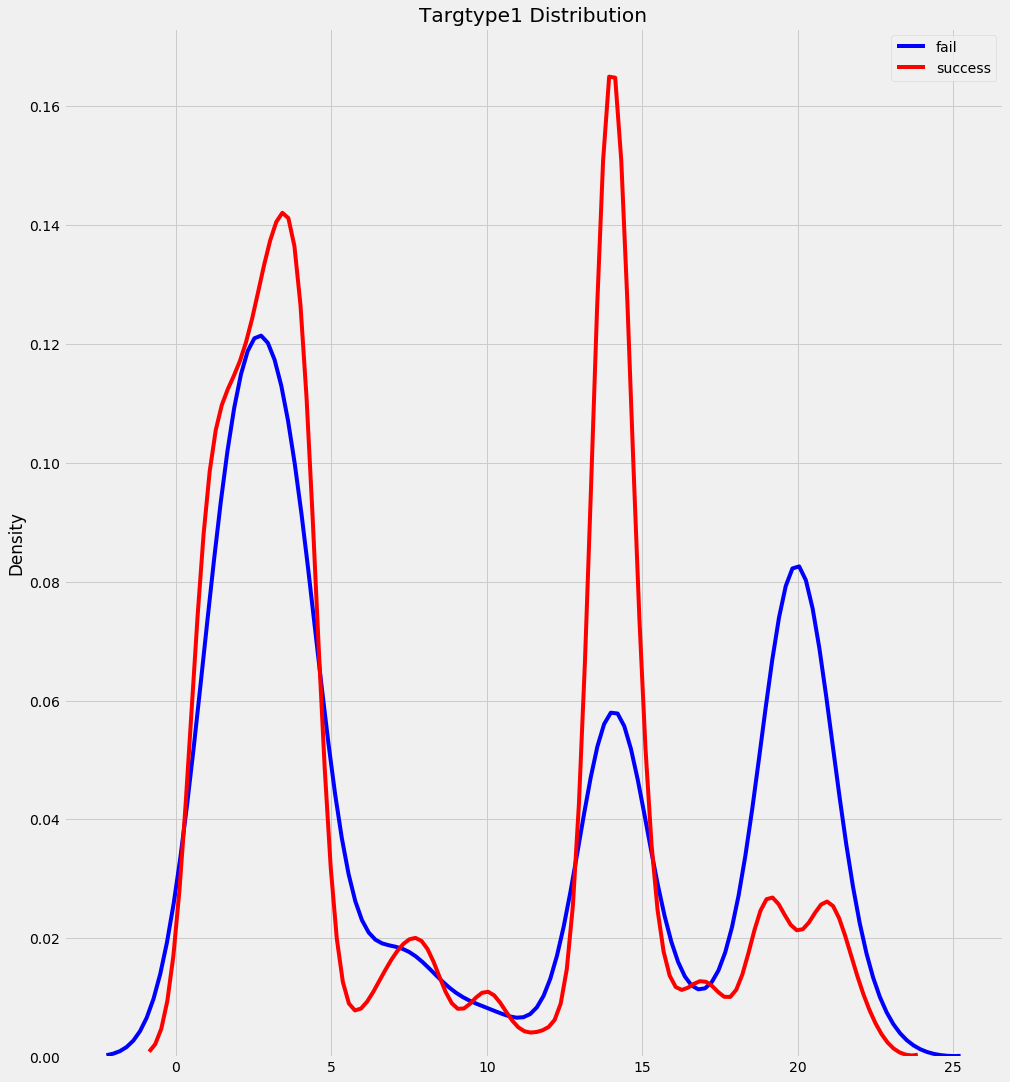

In [25]:
# plot and visualize distribution of success and fails for different targets
plt.figure(figsize = (15, 10))
plt.style.use('fivethirtyeight')

# Color mapping
color_map = OrderedDict({0: 'blue', 1: 'red' })
outcome_map = OrderedDict({0: 'fail', 1: 'success'})

for i, col in enumerate(['targtype1']):
    ax = plt.subplot()
    # Iterate over success/fail
    for outcome, color in color_map.items():
        # Plot outcome for each categoric-class
        chart = sns.kdeplot(df.loc[df['success'] == outcome, col].dropna(),
                            ax = ax, color = color, label = outcome_map[outcome])
    
    #chart.set_xticklabels(chart.get_xticklabels(orig_targ_idx), rotation=45, horizontalalignment='right')    
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(''); plt.ylabel('Density')

plt.subplots_adjust(top = 1.5, hspace=0.3)

## Bivariate Analysis 
- categoric to categoric exploration

Lets look now at the relationship between success variable with other categorical variables of interest by creating a two-way table with the cross-tabulation function and then visualize totals with a graph.

- success and attack-type
- success and weapon-type
- success and victoms (targtype1_txt)

**Success (Target) and Attack-types**

success                                  0       1     All
attacktype1_txt                                           
Armed Assault                         2691   42560   45251
Assassination                         5004   15113   20117
Bombing/Explosion                    11358   80484   91842
Facility/Infrastructure Attack         606   10411   11017
Hijacking                               82     606     688
Hostage Taking (Barricade Incident)     10    1038    1048
Hostage Taking (Kidnapping)            265   11873   12138
Unarmed Assault                        146     950    1096
Unknown                               1507    6760    8267
All                                  21669  169795  191464


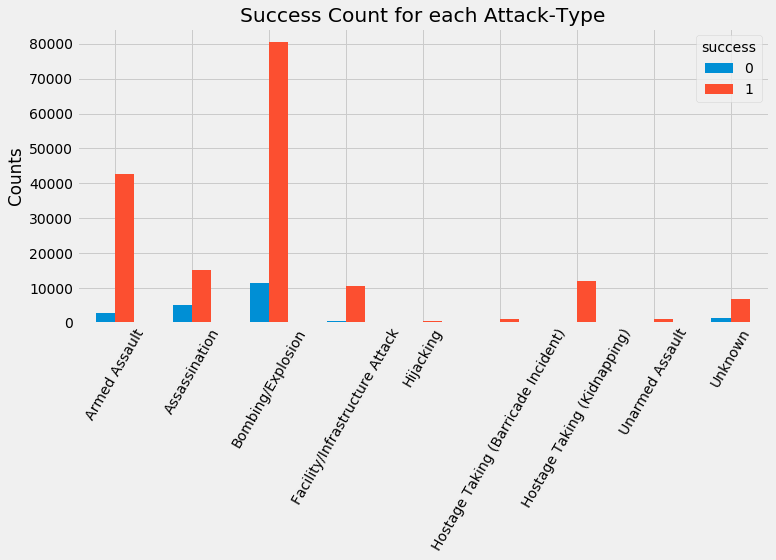

In [26]:
print(pd.crosstab(df.attacktype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(11, 8))
pd.crosstab(df.attacktype1_txt, df.success).plot.bar(ax=ax)
fig.align_xlabels()
ax.tick_params(axis='x', rotation=60)
plt.title('Success Count for each Attack-Type'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                                  0      1    All
attacktype1_txt                                         
Armed Assault                        0.014  0.222  0.236
Assassination                        0.026  0.079  0.105
Bombing/Explosion                    0.059  0.420  0.480
Facility/Infrastructure Attack       0.003  0.054  0.058
Hijacking                            0.000  0.003  0.004
Hostage Taking (Barricade Incident)  0.000  0.005  0.005
Hostage Taking (Kidnapping)          0.001  0.062  0.063
Unarmed Assault                      0.001  0.005  0.006
Unknown                              0.008  0.035  0.043
All                                  0.113  0.887  1.000


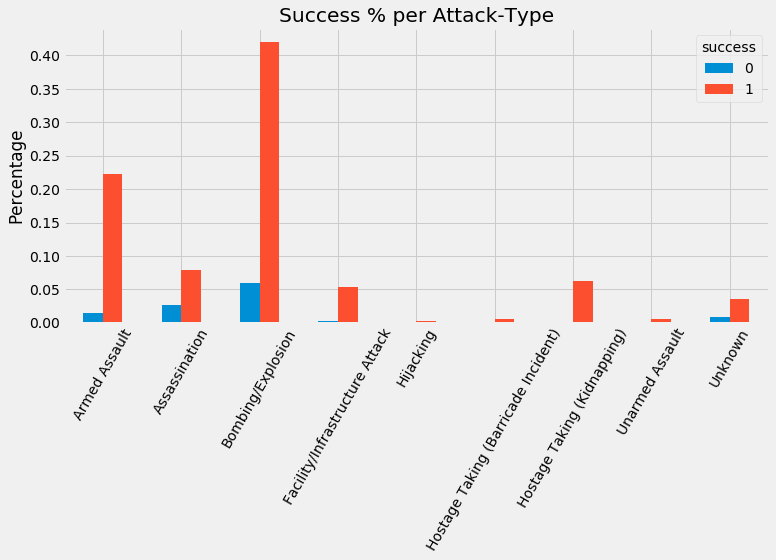

In [27]:
print(round(pd.crosstab(df.attacktype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_by_attktype = round(pd.crosstab(df.attacktype1_txt, df.success, normalize=True), 3)

#yaxis 0-1
#outcome_by_attktype = round(pd.crosstab(df.attacktype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(11,8))
outcome_by_attktype.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=60)
plt.title('Success % per Attack-Type'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

Lets visualize success vs attack-types in another form, with a violinplot

Text(0.5,1,'success vs attacktype1_txt')

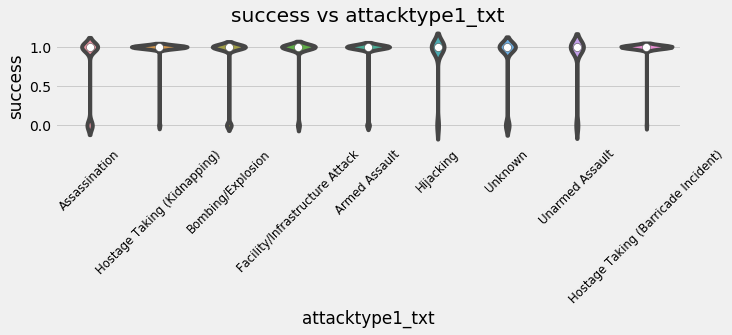

In [28]:
fig, ax = plt.subplots(figsize = (10, 2))
sns.violinplot(x= 'attacktype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=45)
plt.title('success vs attacktype1_txt')

What we gather:
- Total Attacks: **_Bombing/Explosion_ and _Armed Assault_ account for 71.6% of all attacks. Bombing at 48% Armed Assault at 23.6% respectively.** Assasination comes in third at 10.5% of all attacks.
- Successful Attacks: **Bombing/Explosion accounts for 42% of successful attacks and Armed Assault accounts for 22.2%.**

**Success (Target) and Weapon-Type**

In [29]:
df.loc[df.weaptype1_txt == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'weaptype1_txt'] = 'vehicle (non-explosive)'

success                      0       1     All
weaptype1_txt                                 
Biological                  20      15      35
Chemical                    79     257     336
Explosives               13439   82968   96407
Fake Weapons                15      18      33
Firearms                  4944   56941   61885
Incendiary                 706   11085   11791
Melee                      389    3516    3905
Other                       25     102     127
Radiological                12       1      13
Sabotage Equipment           8     150     158
Unknown                   2005   14616   16621
vehicle (non-explosive)     27     126     153
All                      21669  169795  191464


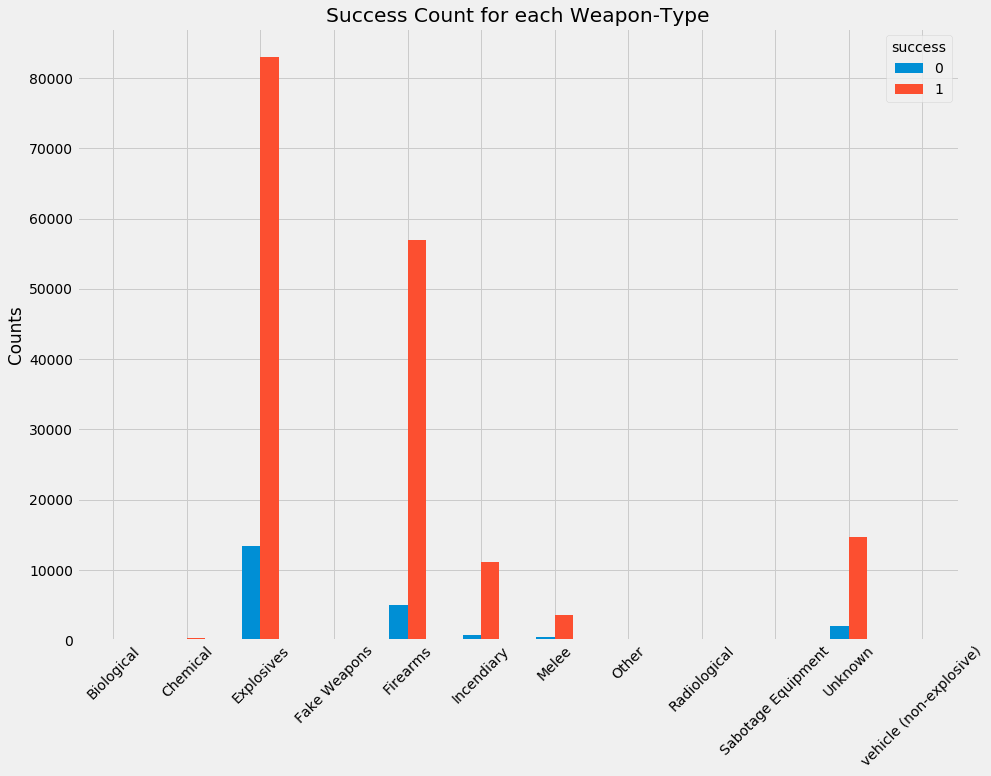

In [30]:
print(pd.crosstab(df.weaptype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(14, 11))
pd.crosstab(df.weaptype1_txt, df.success).plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Success Count for each Weapon-Type'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                      0      1    All
weaptype1_txt                               
Biological               0.000  0.000  0.000
Chemical                 0.000  0.001  0.002
Explosives               0.070  0.433  0.504
Fake Weapons             0.000  0.000  0.000
Firearms                 0.026  0.297  0.323
Incendiary               0.004  0.058  0.062
Melee                    0.002  0.018  0.020
Other                    0.000  0.001  0.001
Radiological             0.000  0.000  0.000
Sabotage Equipment       0.000  0.001  0.001
Unknown                  0.010  0.076  0.087
vehicle (non-explosive)  0.000  0.001  0.001
All                      0.113  0.887  1.000


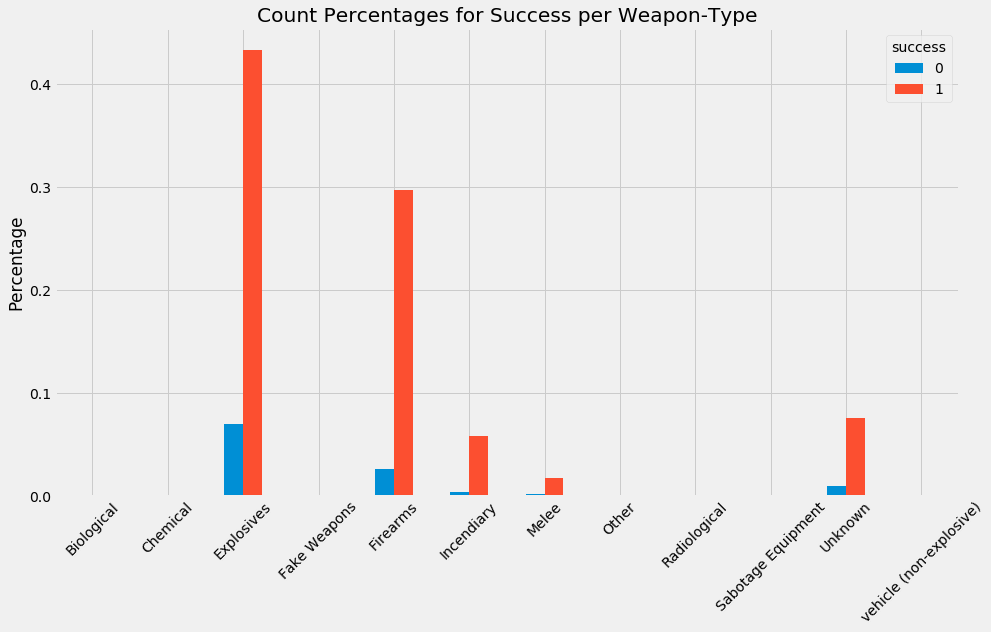

In [31]:
print(round(pd.crosstab(df.weaptype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_by_weaptype = round(pd.crosstab(df.weaptype1_txt, df.success, normalize=True), 3)

#yaxis 0-1
#outcome_by_weaptype = round(pd.crosstab(df.weaptype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_by_weaptype.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Count Percentages for Success per Weapon-Type'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

Text(0.5,1,'success vs weaptype1_txt')

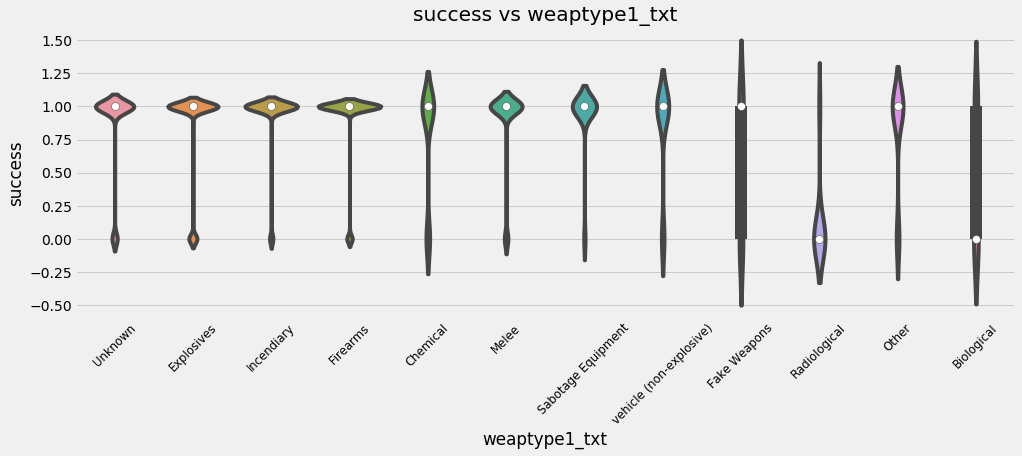

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(x= 'weaptype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=45)
plt.title('success vs weaptype1_txt')

**Success and Target-type (victom)**

success                             0       1     All
targtype1_txt                                        
Abortion Related                   43     222     265
Airports & Aircraft               215    1148    1363
Business                         1468   19809   21277
Educational Institution           402    4098    4500
Food or Water Supply               32     298     330
Government (Diplomatic)           605    3059    3664
Government (General)             3538   18736   22274
Journalists & Media               338    2734    3072
Maritime                           45     326     371
Military                         3141   26837   29978
NGO                                60     960    1020
Other                              14     134     148
Police                           2411   23612   26023
Private Citizens & Property      3131   43152   46283
Religious Figures/Institutions    378    4315    4693
Telecommunication                  62     990    1052
Terrorists/Non-State Militia

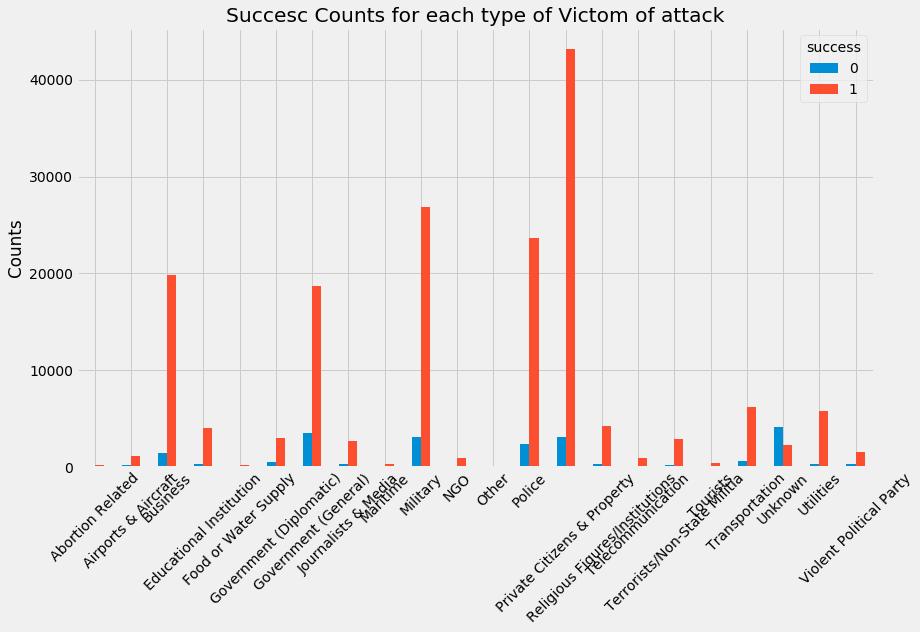

In [33]:
print(pd.crosstab(df.targtype1_txt, df.success, margins=True, margins_name='All'))

fig, ax = plt.subplots(figsize=(13, 9))
pd.crosstab(df.targtype1_txt, df.success).plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Succesc Counts for each type of Victom of attack'), plt.xlabel(''), plt.ylabel('Counts')
plt.tight_layout()

success                             0      1    All
targtype1_txt                                      
Abortion Related                0.000  0.001  0.001
Airports & Aircraft             0.001  0.006  0.007
Business                        0.008  0.103  0.111
Educational Institution         0.002  0.021  0.024
Food or Water Supply            0.000  0.002  0.002
Government (Diplomatic)         0.003  0.016  0.019
Government (General)            0.018  0.098  0.116
Journalists & Media             0.002  0.014  0.016
Maritime                        0.000  0.002  0.002
Military                        0.016  0.140  0.157
NGO                             0.000  0.005  0.005
Other                           0.000  0.001  0.001
Police                          0.013  0.123  0.136
Private Citizens & Property     0.016  0.225  0.242
Religious Figures/Institutions  0.002  0.023  0.025
Telecommunication               0.000  0.005  0.005
Terrorists/Non-State Militia    0.001  0.015  0.017
Tourists    

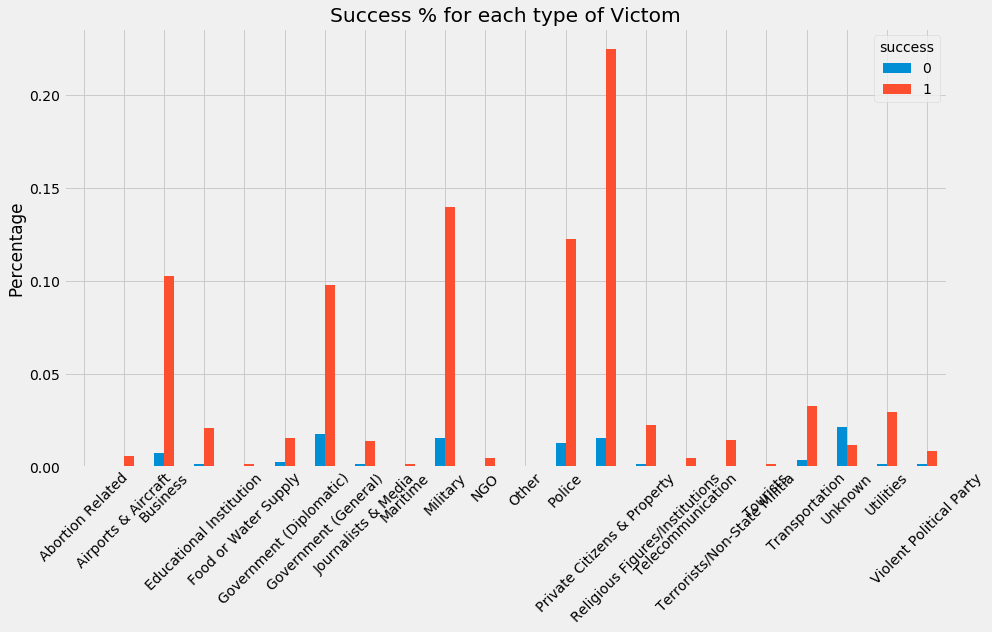

In [34]:
print(round(pd.crosstab(df.targtype1_txt, df.success, margins=True, margins_name='All', normalize=True), 3))
outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True),3)

#yaxis 0-1
#outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_per_victom.plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.title('Success % for each type of Victom'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

**A different look:**
- Grouping by Success/Fail only, as apposed to individual types of victoms. In this plot, the target-types then become the individual bars.

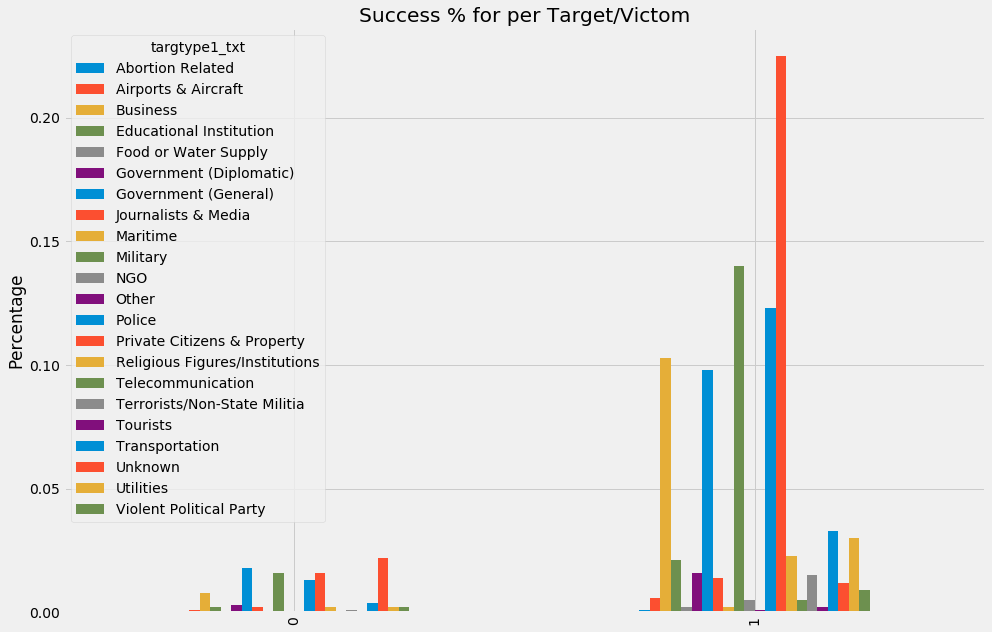

In [35]:
round(pd.crosstab(df.success, df.targtype1_txt, margins=True, margins_name='All', normalize=True), 3)
outcome_per_victom = round(pd.crosstab(df.success, df.targtype1_txt, normalize=True),3)

#yaxis 0-1
#outcome_per_victom = round(pd.crosstab(df.targtype1_txt, df.success, normalize=True, margins=True, margins_name='All'),3)

fig, ax = plt.subplots(figsize=(14,9))
outcome_per_victom.plot.bar(ax=ax)
#ax.tick_params(axis='x', rotation=45)
plt.title('Success % for per Target/Victom'), plt.xlabel(''), plt.ylabel('Percentage')
plt.tight_layout()

Text(0.5,1,'success vs targtype1_txt')

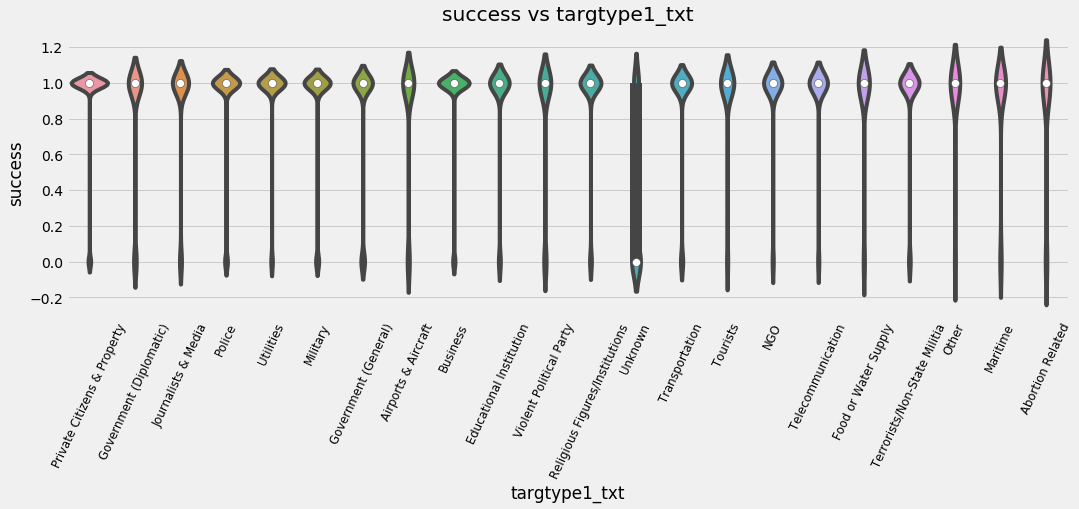

In [36]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.violinplot(x= 'targtype1_txt', y= 'success', data=df)
ax.tick_params(axis='x', labelsize='small', rotation=65)
plt.title('success vs targtype1_txt')

## Bivariate Continued 
- numeric & numeric relationships

Because our potential target is categoric in type, we've up until this cell focused pretty much all on categorical data. Next lets begin taking a look at our numeric data by looking at the correlation between all of our continious variables

In [37]:
df_nums = df.select_dtypes(exclude='object')
print(df_nums.shape)

(191464, 74)


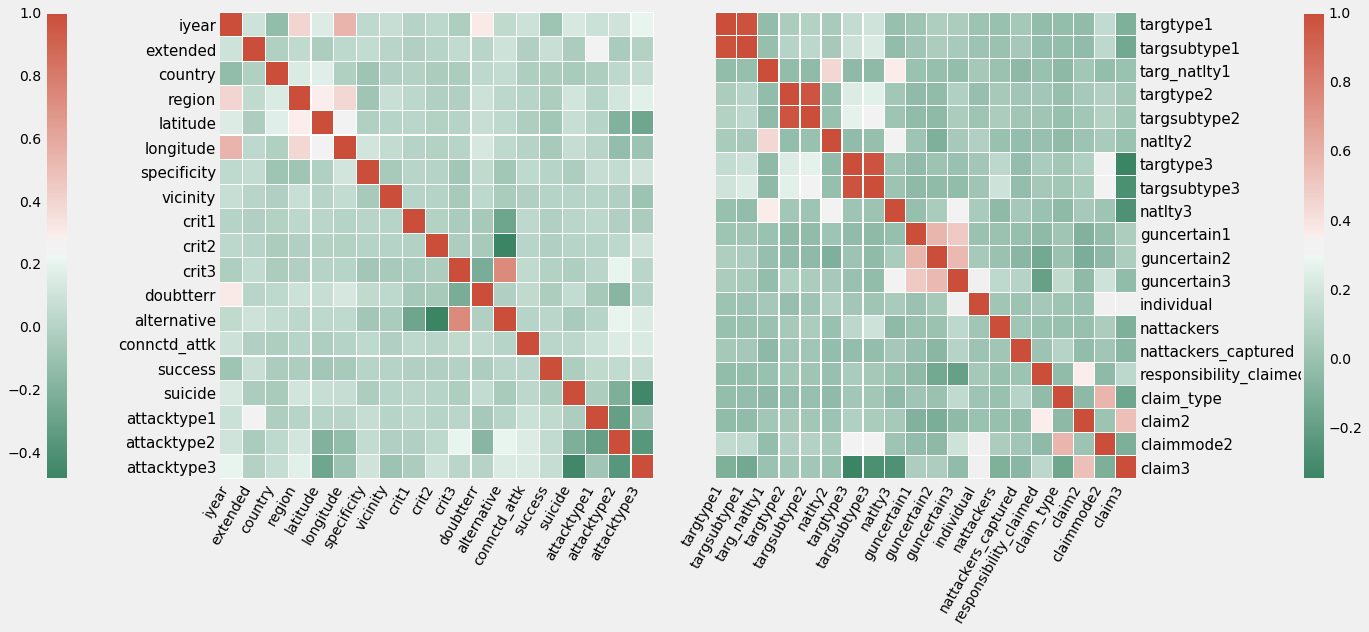

In [38]:
numchunk1 = df_nums.iloc[:, :19]
numchunk2 = df_nums.iloc[:, 19:39]
chunk1_corr = numchunk1.corr()
chunk2_corr = numchunk2.corr()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(23,8))
fig.subplots_adjust(wspace=0.09)
colormap = sns.diverging_palette(150, 17, as_cmap=True)
chart0 = sns.heatmap(chunk1_corr, ax=ax0, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax0.collections[0], ax=ax0, location="left", use_gridspec=False, pad=0.22)
chart0.set_xticklabels(chart0.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart0.set_yticklabels(chart0.get_yticklabels(), fontsize=15)

chart1 = sns.heatmap(chunk2_corr, ax=ax1, cbar=False, cmap=colormap, linewidths=0.12 )
fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.24)
chart1.set_xticklabels(chart1.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart1.set_yticklabels(chart1.get_yticklabels(), fontsize=15)

ax0.tick_params(axis='x', rotation=60)
ax1.yaxis.tick_right()
ax1.tick_params(axis='x', rotation=60)
ax1.tick_params(axis='y', rotation=0)

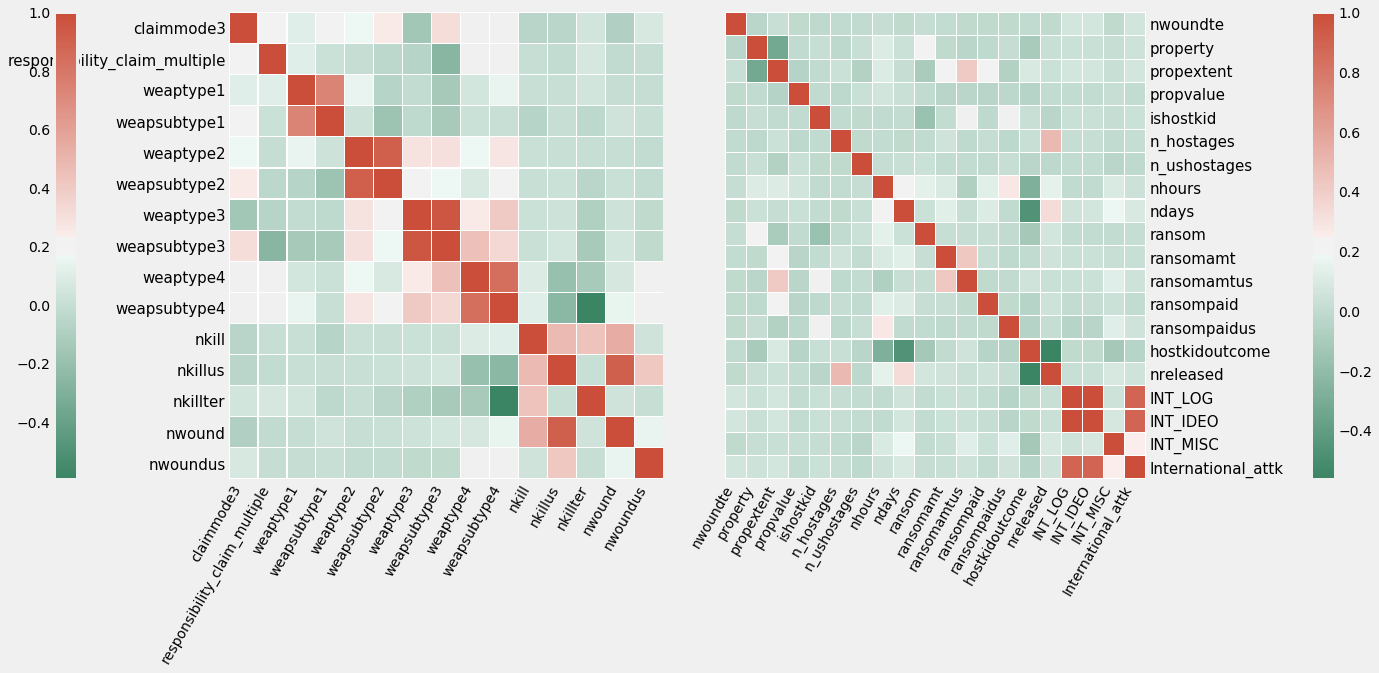

In [39]:
numchunk3 = df_nums.iloc[:, 39:54]
numchunk4 = df_nums.iloc[:, 54:]
chunk3_corr = numchunk3.corr()
chunk4_corr = numchunk4.corr()

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(23, 8)) 
fig.subplots_adjust(wspace=0.09)
colormap = sns.diverging_palette(150, 17, as_cmap=True)

chart3 = sns.heatmap(chunk3_corr, ax=ax0, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax0.collections[0], ax=ax0, location="left", use_gridspec=False, pad=0.22)
chart3.set_xticklabels(chart3.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart3.set_yticklabels(chart3.get_yticklabels(), fontsize=15)

chart4 = sns.heatmap(chunk4_corr, ax=ax1, cbar=False, cmap=colormap, linewidths=0.12)
fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.24)
chart4.set_xticklabels(chart4.get_xticklabels(), fontsize=14, horizontalalignment='right')
chart4.set_yticklabels(chart4.get_yticklabels(), fontsize=15)

ax0.tick_params(axis='x', rotation=60)
ax1.yaxis.tick_right()
ax1.tick_params(axis='x', rotation=60)
ax1.tick_params(axis='y', rotation=0)

**Correlation with Target**

In [57]:
targ_corr_positive = df.corr()['success'].sort_values(ascending=False)
targ_corr_negative = df.corr()['success'].sort_values(ascending=True)

print(targ_corr_positive.head(15))
print('-------------------------')
print(targ_corr_negative.head(15))

success         1.000000
weapsubtype4    0.107014
weapsubtype3    0.086203
targsubtype3    0.080254
extended        0.076344
targtype3       0.071338
weaptype3       0.060732
attacktype3     0.060709
INT_LOG         0.058132
INT_IDEO        0.057461
targtype2       0.056187
nkill           0.053922
attacktype2     0.051341
attacktype1     0.047299
targsubtype2    0.042762
Name: success, dtype: float64
-------------------------
claim3         -0.183395
iyear          -0.086945
weapsubtype1   -0.078955
latitude       -0.071452
targtype1      -0.061876
longitude      -0.052875
weaptype4      -0.039597
country        -0.037320
natlty3        -0.033947
property       -0.033144
suicide        -0.030329
doubtterr      -0.029933
region         -0.028972
claimmode2     -0.028788
claimmode3     -0.027340
Name: success, dtype: float64


**Categorical variable correlation**

_Measure of association_ (the functions I used are from [dython](https://github.com/shakedzy/dython/tree/master/dython))

- Cramer's V

- Theil's U



In [41]:
def cramers_v(x, y):
    error_matrix = pd.crosstab(x,y) # confusion_matrix
    chi2 = scipy.stats.chi2_contingency(error_matrix)[0]
    num = error_matrix.sum().sum()
    phi2 = chi2/num
    rows, cols = error_matrix.shape
    phi2corr = max(0, phi2-((cols-1)*(rows-1))/(num-1))
    row_corr = rows-((rows-1)**2)/(num-1)
    col_corr = cols-((cols-1)**2)/(num-1)
    return np.sqrt(phi2corr/min((col_corr-1),(row_corr-1)))

print('Cramers V association (0-1) for Attack-type and Target:\n {}'.format(round(cramers_v(df.attacktype1_txt, df.success), 4)))
print('Cramers V association (0-1) for Weapon-type and Target:\n {}'.format(round(cramers_v(df.weaptype1_txt, df.success),4)))
print('Cramers V association (0-1) for Target-type and Target:\n {}'.format(round(cramers_v(df.targtype1_txt, df.success),4)))
#print(cramers_v(df.n_hostages, df.success))
print('Cramers V association (0-1) for Hostage-Outcome and Target:\n {}'.format(round(cramers_v(df.hostage_outcome_txt, df.success),4)))
print('Cramers V association (0-1) for Target-entity (corporation/government) and Target:\n {}'.format(round(cramers_v(df.targ_corpgov1, df.success),4)))
print('Cramers V association (0-1) for Specific Target (person/place) and Target:\n {}'.format(round(cramers_v(df.targ_specfc1, df.success),4)))
print('Cramers V association (0-1) for Target Nationality and Target:\n {}'.format(round(cramers_v(df.targ_natlty1_txt, df.success),4)))
print('Cramers V association (0-1) for claimed attacks and Target:\n {}'.format(round(cramers_v(df.responsibility_claimed, df.success),4)))
print('Cramers V association (0-1) for type of claim and Target:\n {}'.format(round(cramers_v(df.claim_type_txt, df.success),4)))
print('Cramers V association (0-1) for multiple terror-group claims and Target:\n {}'.format(round(cramers_v(df.responsibility_claim_multiple, df.success),4)))
print('Cramers V association (0-1) for Terror-group and Target:\n {}'.format(round(cramers_v(df.terr_grp, df.success),4)))
print('Cramers V association (0-1) for additional terror-group claim and Target:\n {}'.format(round(cramers_v(df.terr_grp2, df.success),4)))
print('Cramers V association (0-1) for 3rd terror-group claim and Target:\n {}'.format(round(cramers_v(df.terr_grp3, df.success),4)))
print('Cramers V association (0-1) for property damage and Target:\n {}'.format(round(cramers_v(df.property_damage_txt, df.success),4)))
print('Cramers V association (0-1) for International attack and Target:\n {}'.format(round(cramers_v(df.International_attk, df.success),4)))
print('Cramers V association (0-1) for connected attack and Target:\n {}'.format(round(cramers_v(df.connctd_attk, df.success),4)))

Cramers V association (0-1) for Attack-type and Target:
 0.1908
Cramers V association (0-1) for Weapon-type and Target:
 0.1009
Cramers V association (0-1) for Target-type and Target:
 0.3263
Cramers V association (0-1) for Hostage-Outcome and Target:
 0.1495
Cramers V association (0-1) for Target-entity (corporation/government) and Target:
 0.2716
Cramers V association (0-1) for Specific Target (person/place) and Target:
 0.3274
Cramers V association (0-1) for Target Nationality and Target:
 0.1536
Cramers V association (0-1) for claimed attacks and Target:
 0.0556
Cramers V association (0-1) for type of claim and Target:
 0.0983
Cramers V association (0-1) for multiple terror-group claims and Target:
 0.0088
Cramers V association (0-1) for Terror-group and Target:
 0.1681
Cramers V association (0-1) for additional terror-group claim and Target:
 0.3718
Cramers V association (0-1) for 3rd terror-group claim and Target:
 0.2592
Cramers V association (0-1) for property damage and Target

The only problem with Cramer's V, is it is a symetric, meaning it wont respond or take into account swapping x and y which means that if the value of "x" is known, the y value cant be determined but if the y value is known then we are sure of the x value. Considering this, we need an asymmetric measure of association which we will do below with **Theil's U**.

Theil's U statistic (Uncertainty coefficient) for categorical-categorical association. This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about x, and 1 means y provides full information about x. This is an asymmetric coefficient: U(x,y) != U(y,x)

In [43]:
import collections
import math

def conditional_entropy(x, y): # nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE
    
    y_counter = collections.Counter(y)
    xy_counter = collections.Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = collections.Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = scipy.stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

Unsure of which variable needs to be X and y with Theil's U: see above different outputs for reversed order.

In [44]:
theils_u(df.success, df.attacktype1_txt)

0.051286630569314644

In [45]:
theils_u(df.attacktype1_txt, df.success)

0.012209938814454193

In [ ]:
print('Theils U calculation for Attack-type and Target:\n {}'.format(round(theils_u(df.attacktype1_txt, df.success), 4)))
print('Theils U calculation for Weapon-type and Target:\n {}'.format(round(theils_u(df.weaptype1_txt, df.success),4)))
print('Theils U calculation for Target-type and Target:\n {}'.format(round(theils_u(df.targtype1_txt, df.success),4)))
print('Theils U calculation for Hostage-Outcome and Target:\n {}'.format(round(theils_u(df.hostage_outcome_txt, df.success),4)))
print('Theils U calculation for Target-entity (corporation/government) and Target:\n {}'.format(round(theils_u(df.targ_corpgov1, df.success),4)))
print('Theils U calculation for Specific Target (person/place) and Target:\n {}'.format(round(theils_u(df.targ_specfc1, df.success),4)))
print('Theils U calculation for Target Nationality and Target:\n {}'.format(round(theils_u(df.targ_natlty1_txt, df.success),4)))
print('Theils U calculation for claimed attacks and Target:\n {}'.format(round(theils_u(df.responsibility_claimed, df.success),4)))
print('Theils U calculation for type of claim and Target:\n {}'.format(round(theils_u(df.claim_type_txt, df.success),4)))
print('Theils U calculation for multiple terror-group claims and Target:\n {}'.format(round(theils_u(df.responsibility_claim_multiple, df.success),4)))
print('Theils U calculation for Terror Group and Target:\n {}'.format(round(theils_u(df.terr_grp, df.success),4)))
print('Theils U calculation for Additional Terror Group Claim and Target:\n {}'.format(round(theils_u(df.terr_grp2, df.success),4)))
print('Theils U calculation for 3rd Terror Group Claim and Target:\n {}'.format(round(theils_u(df.terr_grp3, df.success),4)))
print('Theils U calculation for Property Damage and Target:\n {}'.format(round(theils_u(df.property_damage_txt, df.success),4)))
print('Theils U calculation for International Attack and Target:\n {}'.format(round(theils_u(df.International_attk, df.success),4)))
print('Theils U calculation for Connected Attack and Target:\n {}'.format(round(theils_u(df.connctd_attk, df.success),4)))

**Remove highly collinear variables**

In [93]:
corr_matrix = df.corr()

#Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [94]:
#Find index of variables with correlation greater than 0.95
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]
print('Variables with extremely high correlation (>95%) that will be removed from dataset:\n\n ' + str(to_drop) + '.\n')

Variables with extremely high correlation (>95%) that will be removed from dataset:

 ['targsubtype1', 'targsubtype2', 'targsubtype3', 'weapsubtype3', 'weapsubtype4', 'ndays', 'INT_IDEO'].



              targtype1  targsubtype1
targtype1      1.000000      0.982384
targsubtype1   0.982384      1.000000


Text(0.5,1,'ransompaid versus attacktype3')

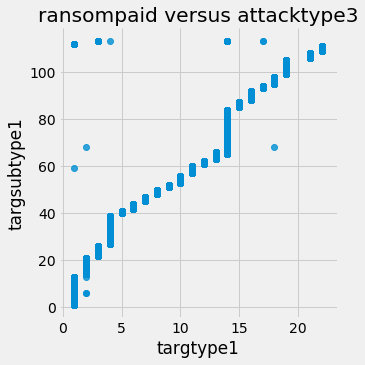

In [110]:
# determine variable thats highly correlated with "targsubtype1"
print(corr_matrix.loc[corr_matrix['targsubtype1'] > 0.9, corr_matrix['targsubtype1'] > 0.9])

sns.lmplot('targtype1', 'targsubtype1', data=df, fit_reg=False)
plt.title('ransompaid versus attacktype3')

              targtype2  targsubtype2  weapsubtype4
targtype2      1.000000      0.972578           1.0
targsubtype2   0.972578      1.000000           1.0
weapsubtype4   1.000000      1.000000           1.0


Text(0.5,1,'ransompaid versus attacktype3')

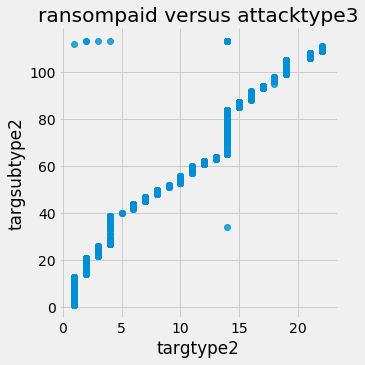

In [112]:
# determine variable thats highly correlated with "targsubtype2"
print(corr_matrix.loc[corr_matrix['targsubtype2'] > 0.9, corr_matrix['targsubtype2'] > 0.9])

sns.lmplot('targtype2', 'targsubtype2', data=df, fit_reg=False)
plt.title('ransompaid versus attacktype3')

              targtype3  targsubtype3
targtype3      1.000000      0.974246
targsubtype3   0.974246      1.000000


Text(0.5,1,'ransompaid versus attacktype3')

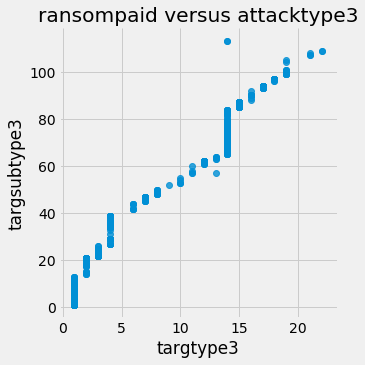

In [115]:
# determine variable thats highly correlated with "targsubtype3"
print(corr_matrix.loc[corr_matrix['targsubtype3'] > 0.9, corr_matrix['targsubtype3'] > 0.9])

sns.lmplot('targtype3', 'targsubtype3', data=df, fit_reg=False)
plt.title('ransompaid versus attacktype3')

              weaptype3  weapsubtype3
weaptype3       1.00000       0.95695
weapsubtype3    0.95695       1.00000


Text(0.5,1,'ransompaid versus attacktype3')

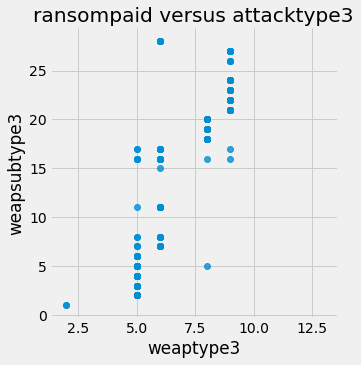

In [116]:
# determine variable thats highly correlated with "weapsubtype3"
print(corr_matrix.loc[corr_matrix['weapsubtype3'] > 0.9, corr_matrix['weapsubtype3'] > 0.9])

sns.lmplot('weaptype3', 'weapsubtype3', data=df, fit_reg=False)
plt.title('ransompaid versus attacktype3')

              targtype2  targsubtype2   natlty2  weapsubtype4     ndays  \
targtype2      1.000000      0.972578 -0.022837      1.000000 -0.019361   
targsubtype2   0.972578      1.000000 -0.009738      1.000000 -0.004327   
natlty2       -0.022837     -0.009738  1.000000      1.000000  0.051349   
weapsubtype4   1.000000      1.000000  1.000000      1.000000  0.989554   
ndays         -0.019361     -0.004327  0.051349      0.989554  1.000000   
ransomamt      0.097549      0.077324 -0.046074      0.904194  0.129407   

              ransomamt  
targtype2      0.097549  
targsubtype2   0.077324  
natlty2       -0.046074  
weapsubtype4   0.904194  
ndays          0.129407  
ransomamt      1.000000  


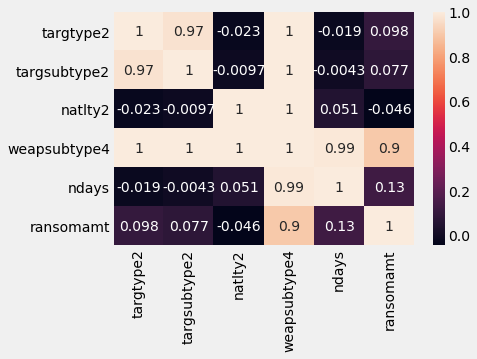

In [117]:
# determine variable thats highly correlated with "weapsubtype4"
print(corr_matrix.loc[corr_matrix['weapsubtype4'] > 0.9, corr_matrix['weapsubtype4'] > 0.9])

sns.heatmap(corr_matrix.loc[corr_matrix['weapsubtype4'].abs() > 0.9, corr_matrix['weapsubtype4'].abs() > 0.9], annot=True)

We can see from above heatmap that we've got several variables thatre correlating highly (90%) "weapsubtype4". We do not need to keep all of these, that goes for all fo the corresponding variables shown individually int he above correlation matrices and scatter-plots.

           INT_LOG  INT_IDEO
INT_LOG   1.000000  0.996288
INT_IDEO  0.996288  1.000000


Text(0.5,1,'ransompaid versus attacktype3')

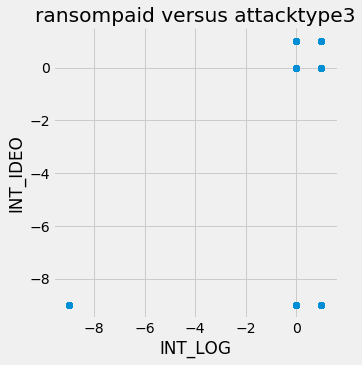

In [121]:
# determine variable thats highly correlated with "INT_IDEO"
print(corr_matrix.loc[corr_matrix['INT_IDEO'] > 0.9, corr_matrix['INT_IDEO'] > 0.9])

sns.lmplot('INT_LOG', 'INT_IDEO', data=df, fit_reg=False)
plt.title('ransompaid versus attacktype3')

In [ ]:
#Drop features
#df.drop(to_drop, axis=1, inplace=True)
_ = str('Shape of dataset as a whole, after removing columns that held greater than 95 percent missing values\nas well as all highly collinear variables, for all data types(integer, float, categorical):\n ' + str(df.shape) + '.')
print(_)

**#Variable Correlation**

_Lets take a look at the correlation of remaining variables (after removing highly collinear cols) with a heatmap_

corr = df.corr()

#Customize a colormap_

colormap = sns.diverging_palette(150, 17, as_cmap=True)

#Plot heatmap

fig, axes = plt.subplots(figsize=(55,55))
heatmap = sns.heatmap(corr, ax=axes, cmap=colormap, linewidth=0.1, annot=True)
plt.tight_layout()

**#Impute missing values before ML tasks**

#Impute numerical missing values with mean

df[int_cols] = df[int_cols].fillna(df[int_cols].mean(),inplace=True)

df[float_cols] = df[float_cols].fillna(df[float_cols].mean(),inplace=True)

#Impute categorical missing values

df[cat_cols] = df[cat_cols].fillna(value = -99)